## **Dashboard**

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

In [2]:
df = pd.read_csv("data\\final_dataset.csv", parse_dates = ['Date'])

### **Dashboard 1**

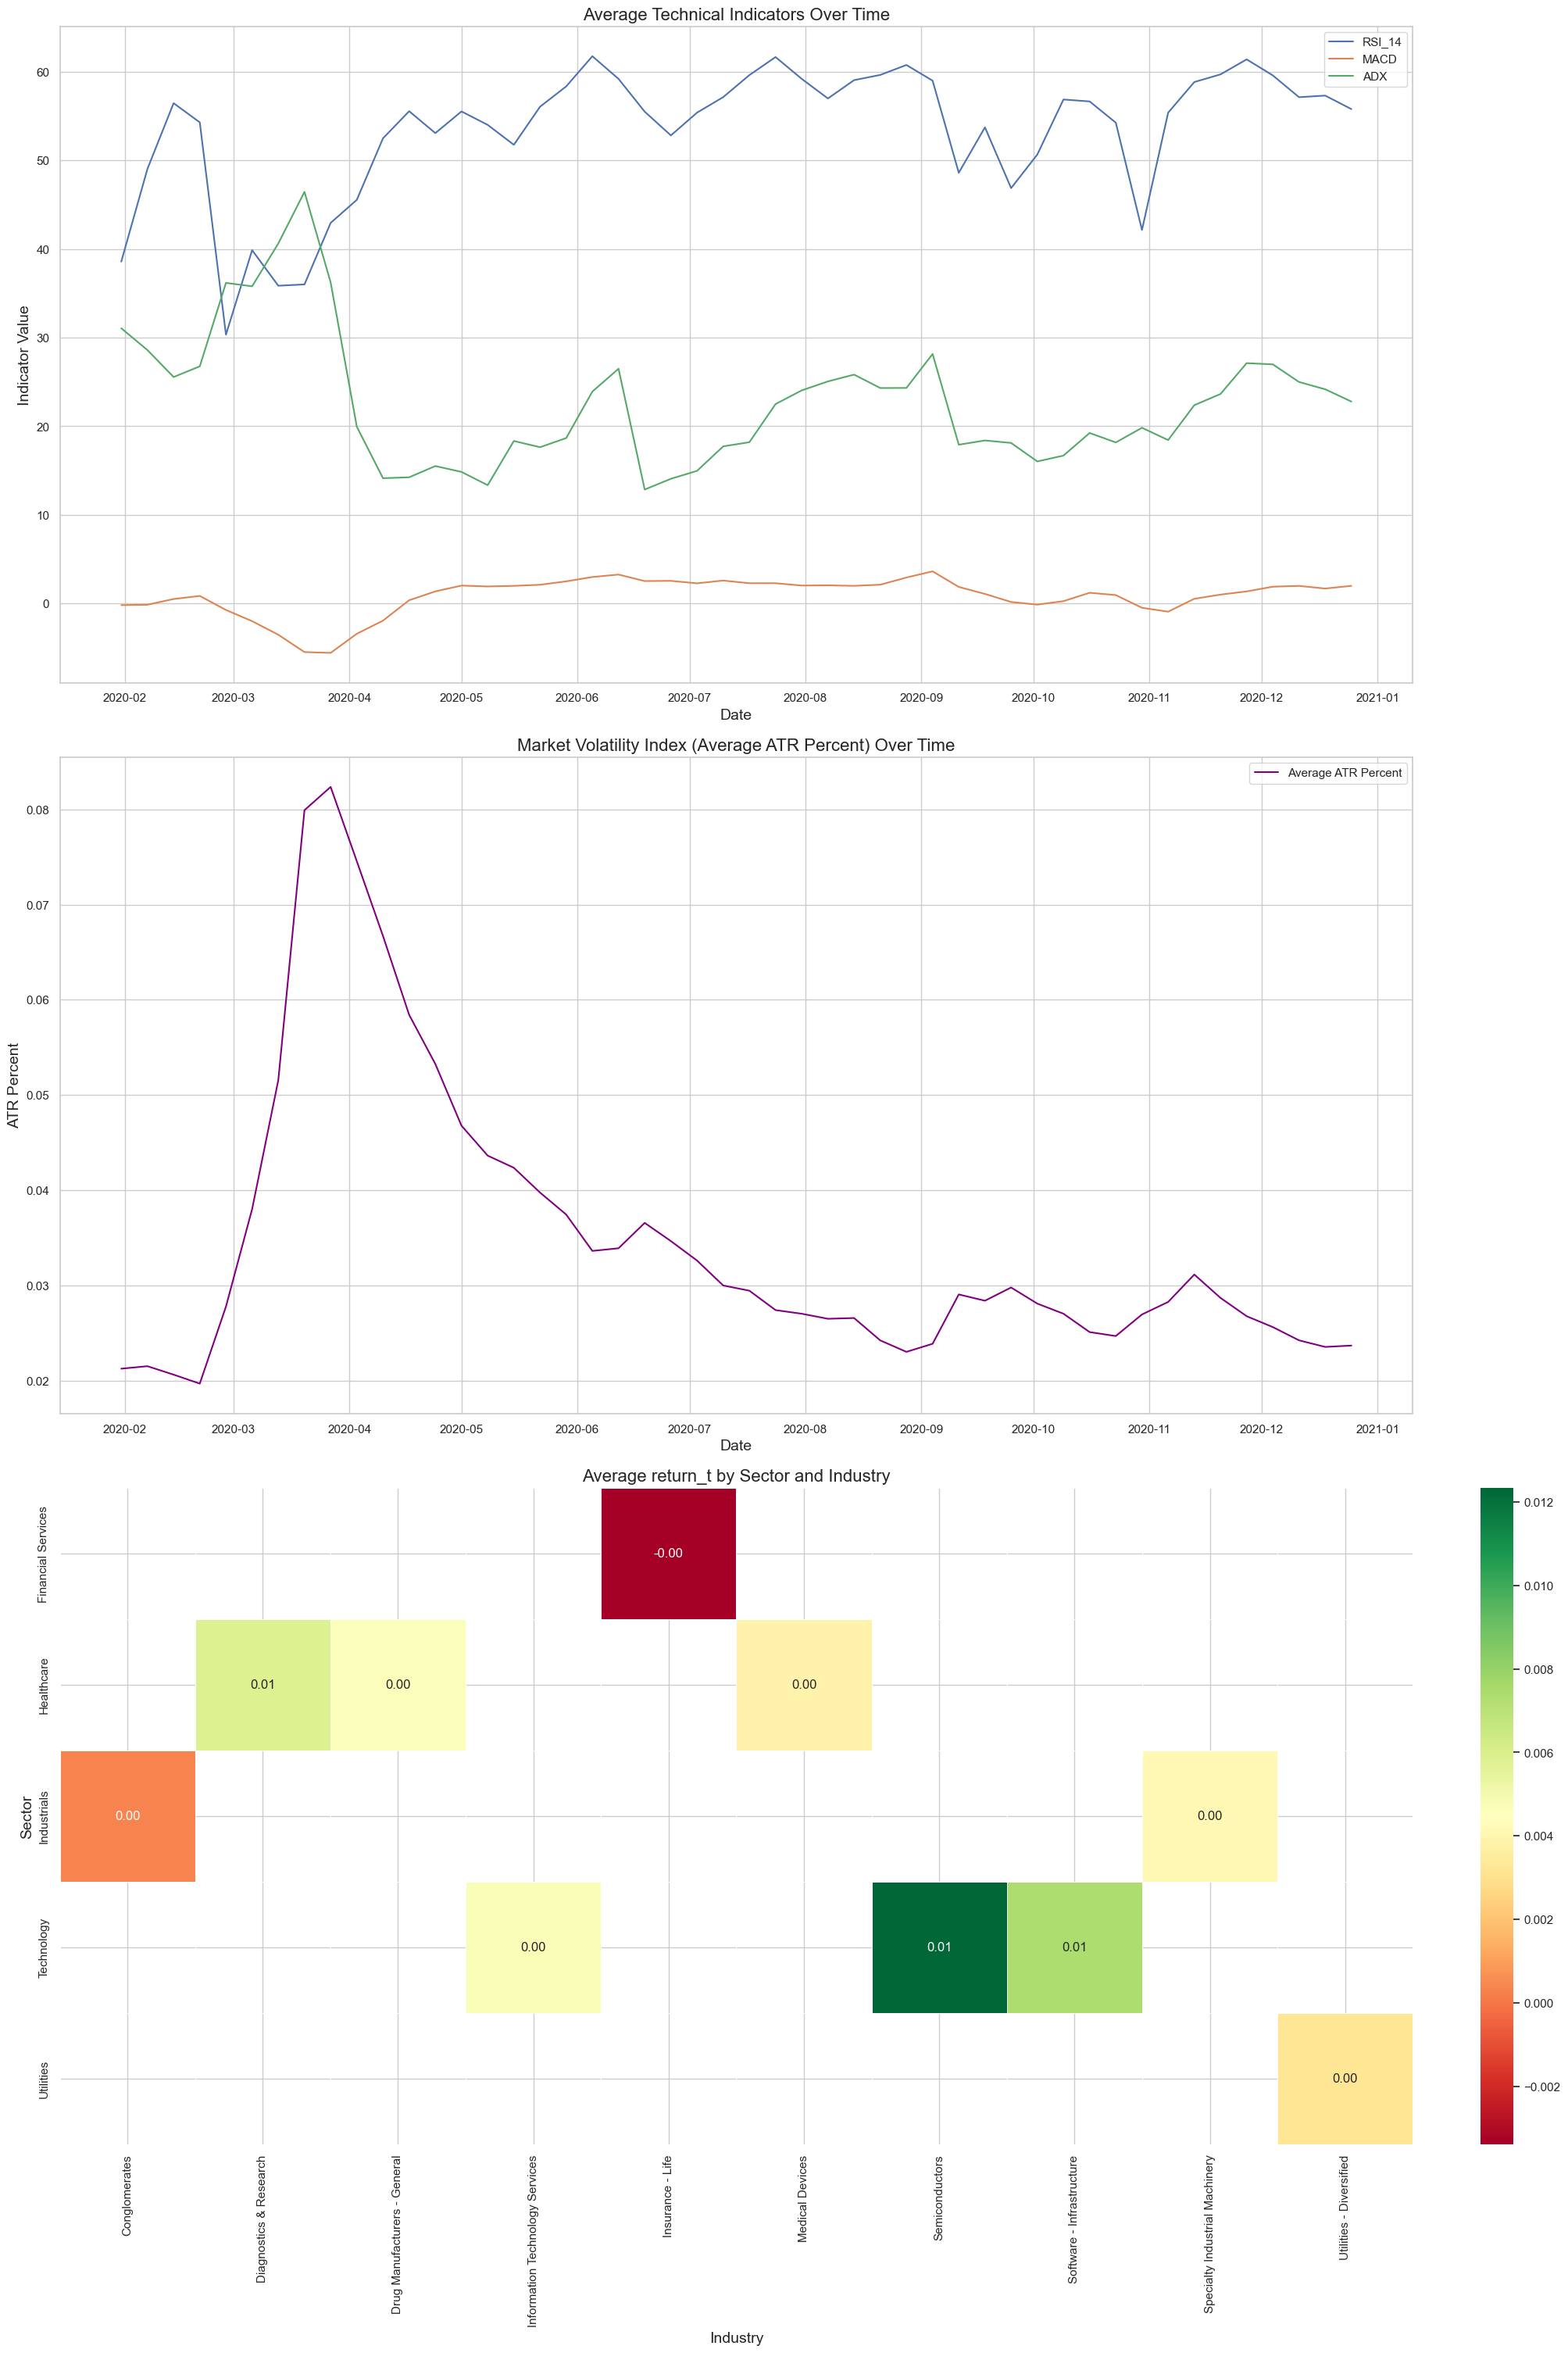

In [3]:
technical_indicators = ['rsi_14', 'macd', 'adx']
avg_technical = df.groupby('Date')[technical_indicators].mean().reset_index()

# Group by Date and calculate the mean of 'atr_percent'
avg_volatility = df.groupby('Date')['atr_percent'].mean().reset_index()


return_metric = 'return_t'

# Group by Sector and Industry, then calculate the mean return
sector_performance = df.groupby(['sector', 'industry'])[return_metric].mean().reset_index()

# Pivot the data to create a matrix suitable for a heatmap
performance_pivot = sector_performance.pivot(index='sector', columns='industry', values=return_metric)


# Initialize the figure
fig = plt.figure(constrained_layout=True, figsize=(20, 30))
gs = fig.add_gridspec(3, 1)  # 3 rows: Technical Indicators, Volatility Index, Heatmap

# 1. Average Technical Indicators Over Time
ax1 = fig.add_subplot(gs[0, 0])
for indicator in technical_indicators:
    sns.lineplot(data=avg_technical, x='Date', y=indicator, label=indicator.upper(), ax=ax1)
ax1.set_title('Average Technical Indicators Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Indicator Value')
ax1.legend()
ax1.grid(True)

# 2. Market Volatility Index
ax2 = fig.add_subplot(gs[1, 0])
sns.lineplot(data=avg_volatility, x='Date', y='atr_percent', color='purple', label='Average ATR Percent', ax=ax2)
ax2.set_title('Market Volatility Index (Average ATR Percent) Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('ATR Percent')
ax2.legend()
ax2.grid(True)

# 3. Sector Performance Heatmap
ax3 = fig.add_subplot(gs[2, 0])
sns.heatmap(performance_pivot, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=.5, ax=ax3)
ax3.set_title(f'Average {return_metric} by Sector and Industry')
ax3.set_xlabel('Industry')
ax3.set_ylabel('Sector')

plt.show()

### **Dashboard 2**

C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\4263087717.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\4263087717.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


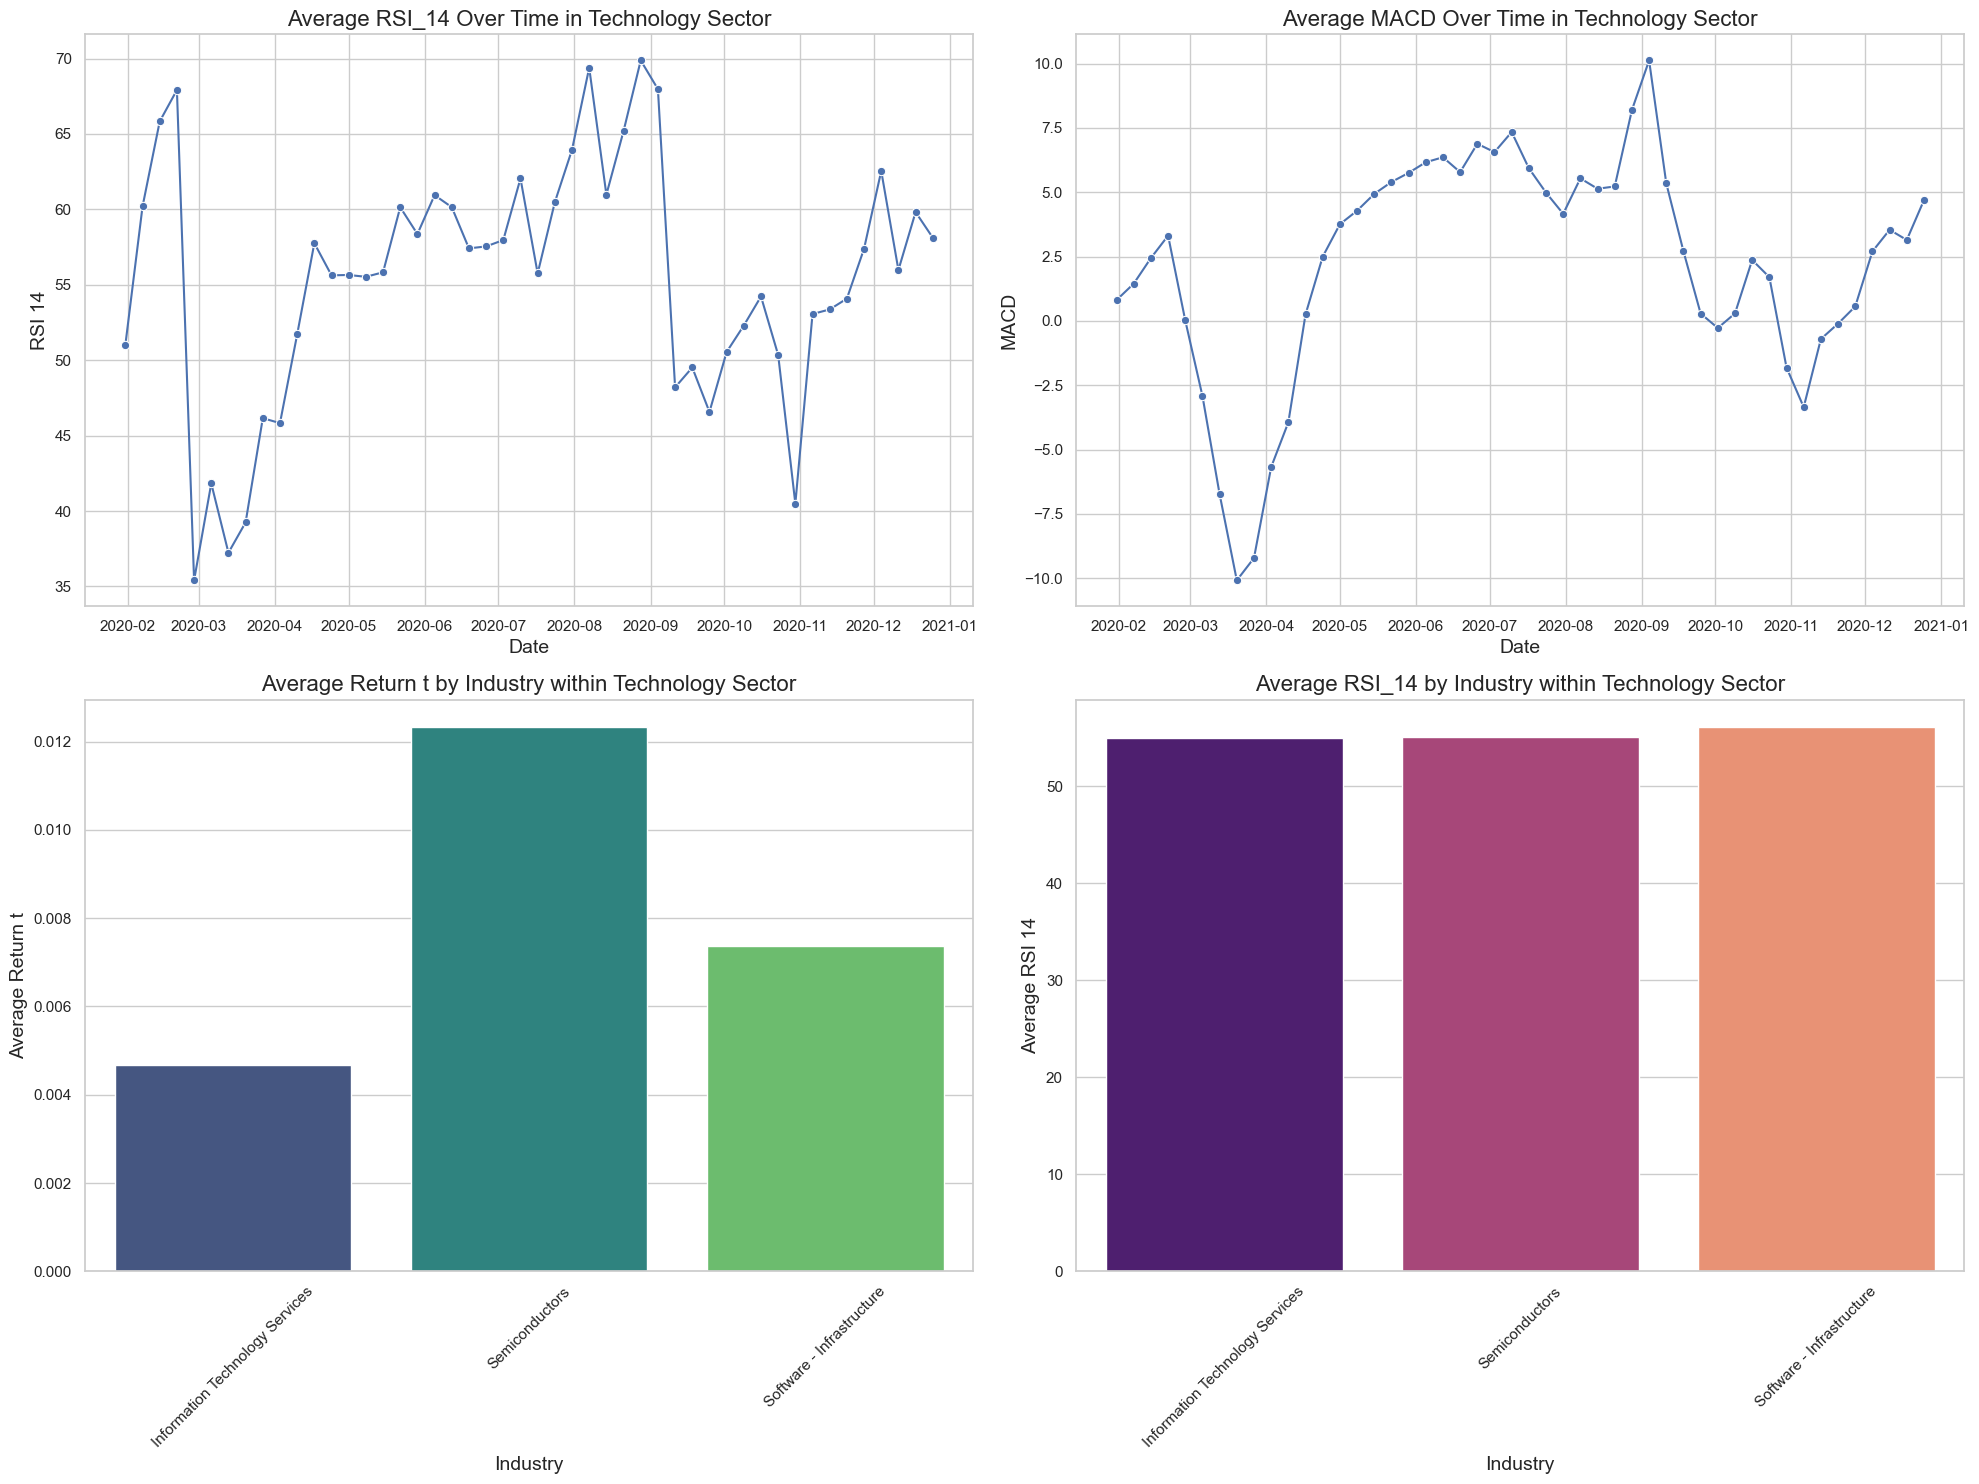

In [4]:
# Initialize the figure
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Define the technical indicators to average
technical_indicators = ['rsi_14', 'macd', 'adx']

# Group by Date and Sector, then calculate the mean of each technical indicator
avg_technical_sector = df.groupby(['Date', 'sector'])[technical_indicators].mean().reset_index()

# Define the sector of interest
selected_sector = 'Technology'  # You can change this to any sector in your dataset

# Define the metrics to compare
metrics = ['return_t', 'rsi_14', 'macd', 'adx']

# Filter data for the selected sector
sector_data = df[df['sector'] == selected_sector]

# Group by Industry and calculate the mean of the metrics
avg_metrics_industry = sector_data.groupby('industry')[metrics].mean().reset_index()

# 1. Sector-wise RSI Trends
sns.lineplot(
    data=avg_technical_sector[avg_technical_sector['sector'] == selected_sector],
    x='Date',
    y='rsi_14',
    hue='sector',
    marker='o',
    ax=axes[0, 0]
)
axes[0, 0].set_title(f'Average RSI_14 Over Time in {selected_sector} Sector')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('RSI 14')
axes[0, 0].legend().set_visible(False)

# 2. Sector-wise MACD Trends
sns.lineplot(
    data=avg_technical_sector[avg_technical_sector['sector'] == selected_sector],
    x='Date',
    y='macd',
    hue='sector',
    marker='o',
    ax=axes[0, 1]
)
axes[0, 1].set_title(f'Average MACD Over Time in {selected_sector} Sector')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('MACD')
axes[0, 1].legend().set_visible(False)

# 3. Industry Return Comparison
sns.barplot(
    data=avg_metrics_industry,
    x='industry',
    y='return_t',
    palette='viridis',
    ax=axes[1, 0]
)
axes[1, 0].set_title(f'Average Return t by Industry within {selected_sector} Sector')
axes[1, 0].set_xlabel('Industry')
axes[1, 0].set_ylabel('Average Return t')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Industry RSI Comparison
sns.barplot(
    data=avg_metrics_industry,
    x='industry',
    y='rsi_14',
    palette='magma',
    ax=axes[1, 1]
)
axes[1, 1].set_title(f'Average RSI_14 by Industry within {selected_sector} Sector')
axes[1, 1].set_xlabel('Industry')
axes[1, 1].set_ylabel('Average RSI 14')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **Dashboard 3**


Overbought/Oversold Stocks Summary:
                 Condition  Number of Stocks  Percentage
0    Overbought (RSI > 70)                20    4.166667
1      Oversold (RSI < 30)                14    2.916667
2  Neutral (30 ≤ RSI ≤ 70)               446   92.916667


C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\1549650565.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Condition', y='Number of Stocks', data=summary_df, palette=colors, ax=ax_bar)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\1549650565.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)


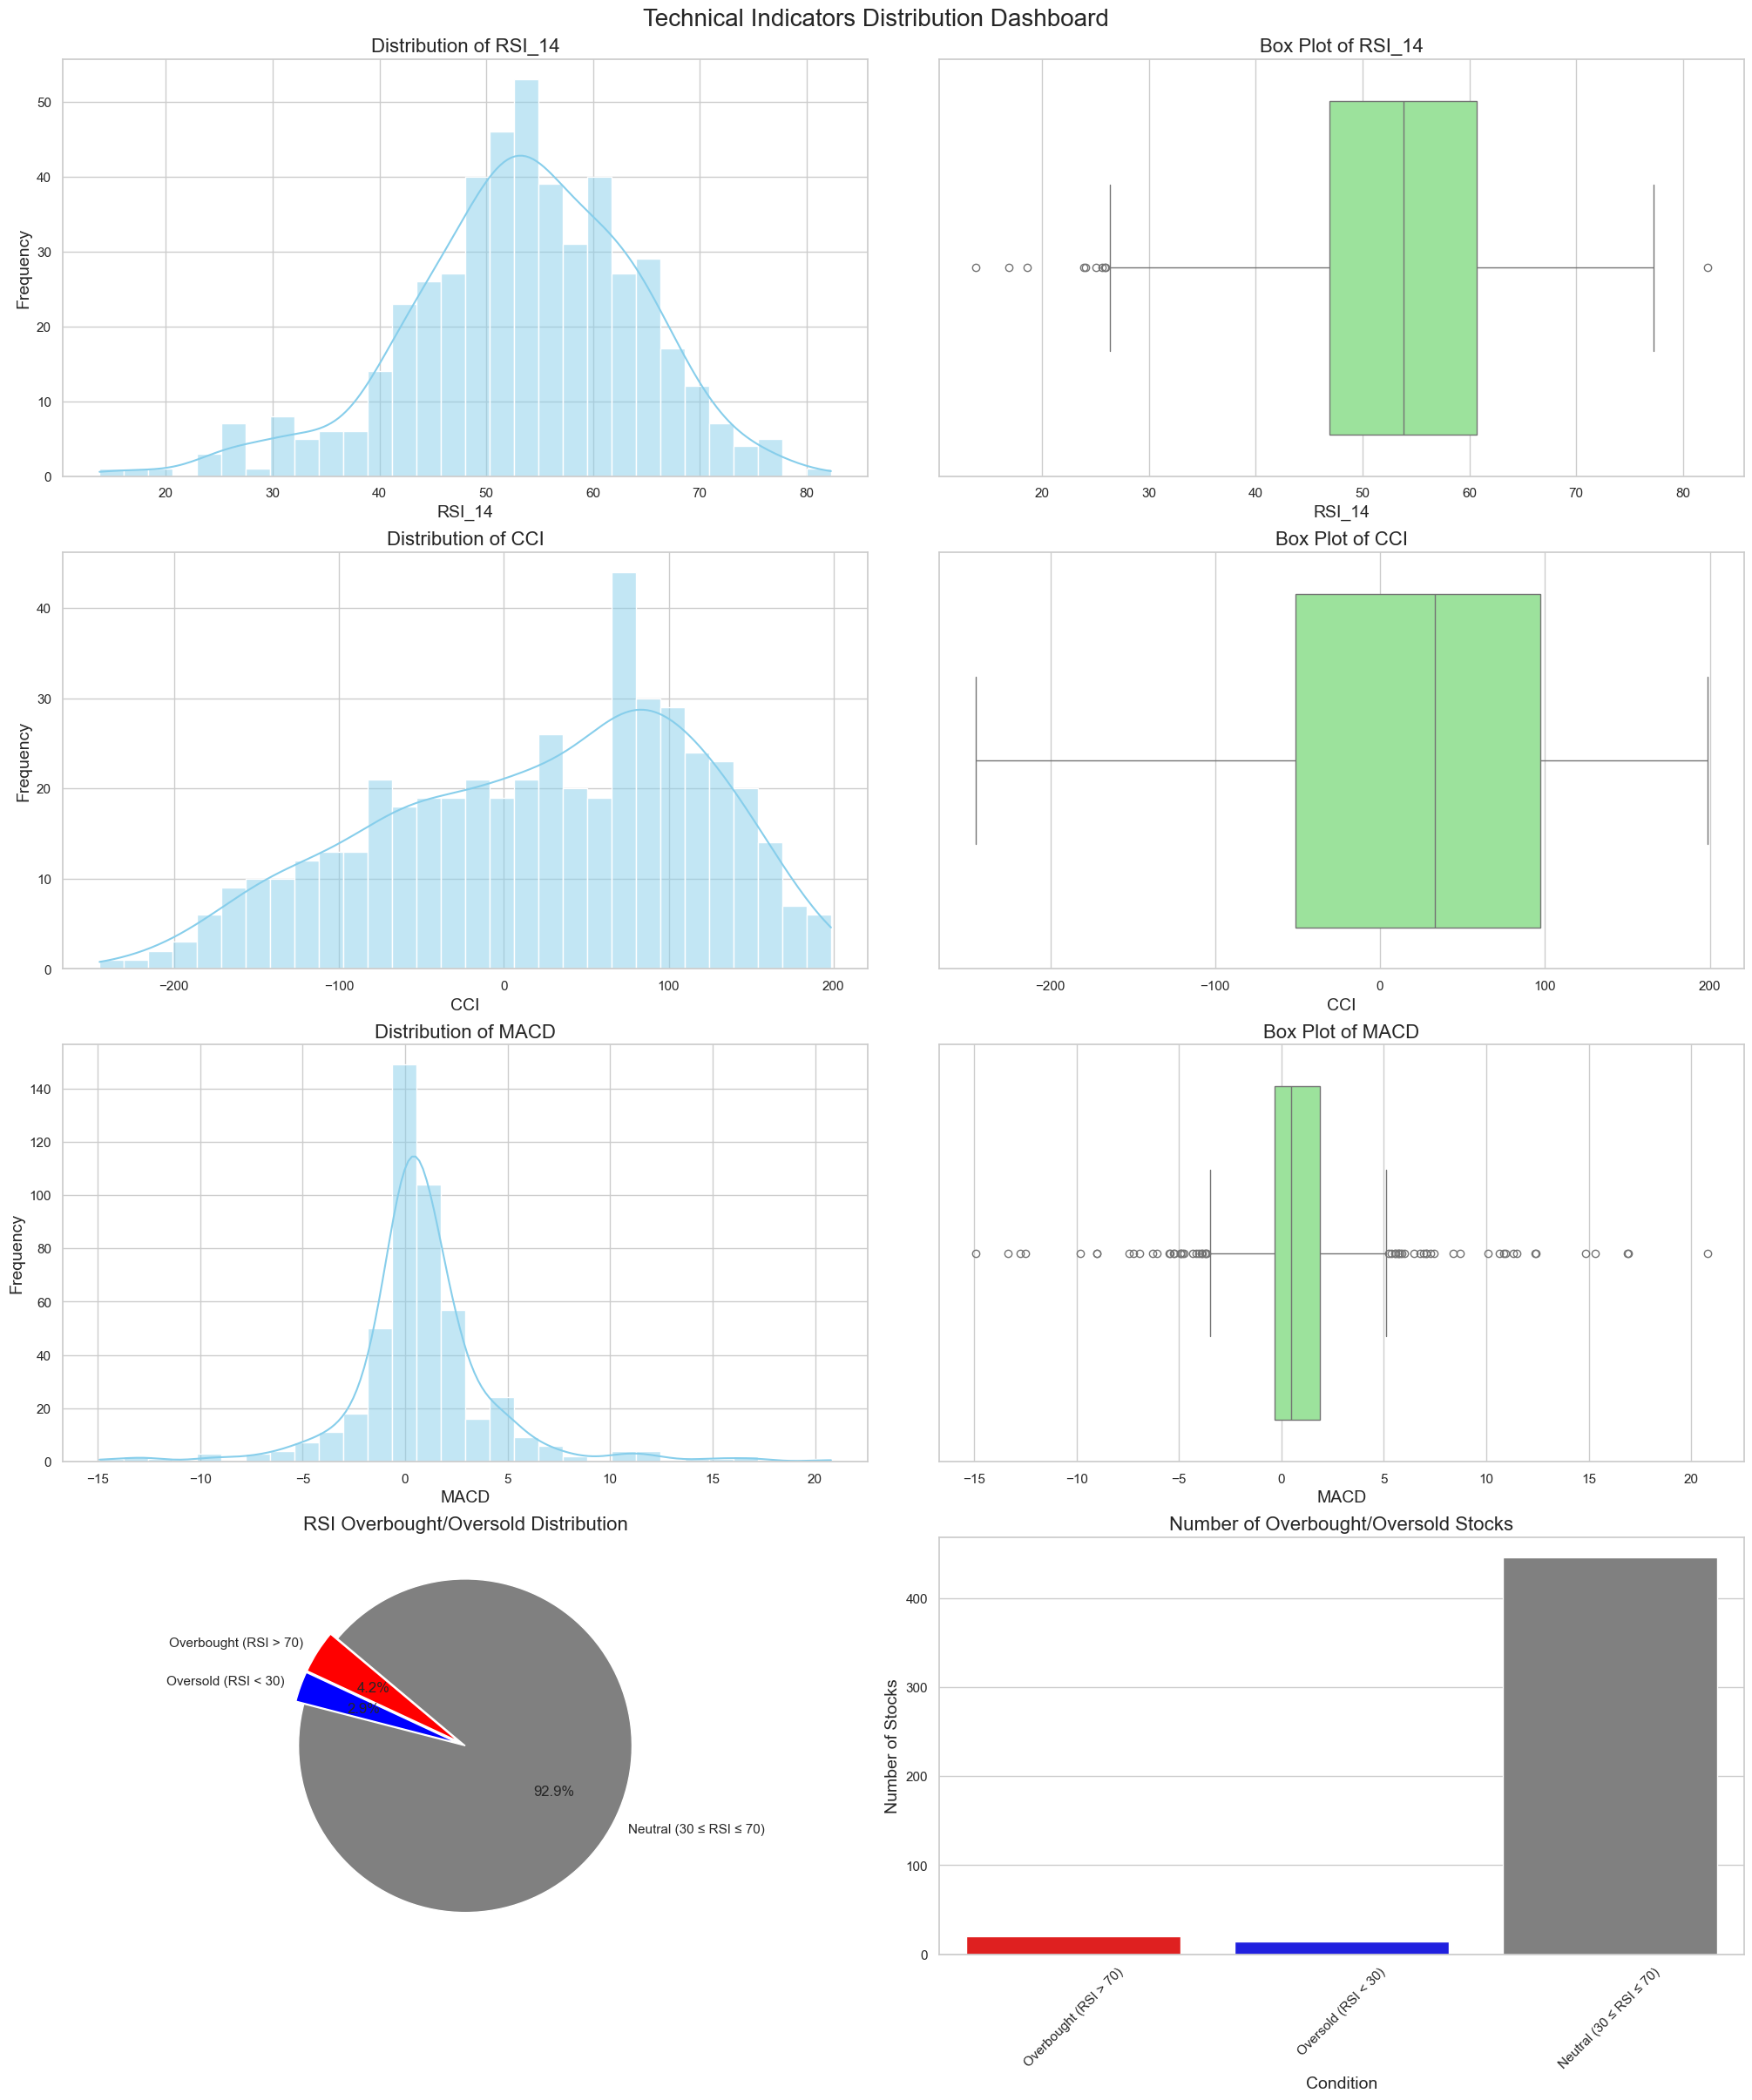

In [5]:
# ---------------------------
# 2. Indicator Histograms and Box Plots
# ---------------------------

# Define the technical indicators to analyze
technical_indicators = ['rsi_14', 'cci', 'macd']

# ---------------------------
# 3. Overbought/Oversold Stocks Summary
# ---------------------------

# Define thresholds for RSI
overbought_threshold = 70
oversold_threshold = 30

# Calculate the number and percentage of overbought and oversold stocks
total_stocks = len(df)
overbought = len(df[df['rsi_14'] > overbought_threshold])
oversold = len(df[df['rsi_14'] < oversold_threshold])
neutral = total_stocks - overbought - oversold

# Create a summary DataFrame
summary_data = {
    'Condition': ['Overbought (RSI > 70)', 'Oversold (RSI < 30)', 'Neutral (30 ≤ RSI ≤ 70)'],
    'Number of Stocks': [overbought, oversold, neutral],
    'Percentage': [overbought / total_stocks * 100,
                   oversold / total_stocks * 100,
                   neutral / total_stocks * 100]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
print("\nOverbought/Oversold Stocks Summary:")
print(summary_df)

# ---------------------------
# 4. Plotting Overbought/Oversold Summary
# ---------------------------
colors = ['red', 'blue', 'grey']


# Initialize the figure
fig = plt.figure(constrained_layout=True, figsize=(20, 24))
gs = fig.add_gridspec(4, 2)

# 5.1. Indicator Histograms and Box Plots
for i, indicator in enumerate(technical_indicators):
    # Histogram
    ax_hist = fig.add_subplot(gs[i, 0])
    sns.histplot(df[indicator], bins=30, kde=True, color='skyblue', ax=ax_hist)
    ax_hist.set_title(f'Distribution of {indicator.upper()}')
    ax_hist.set_xlabel(indicator.upper())
    ax_hist.set_ylabel('Frequency')
    
    # Box Plot
    ax_box = fig.add_subplot(gs[i, 1])
    sns.boxplot(x=df[indicator], color='lightgreen', ax=ax_box)
    ax_box.set_title(f'Box Plot of {indicator.upper()}')
    ax_box.set_xlabel(indicator.upper())

# 5.2. Overbought/Oversold Summary - Pie Chart
ax_pie = fig.add_subplot(gs[3, 0])
ax_pie.pie(summary_df['Percentage'], labels=summary_df['Condition'], autopct='%1.1f%%',
           startangle=140, colors=colors, explode=(0.05, 0.05, 0))
ax_pie.set_title('RSI Overbought/Oversold Distribution')

# 5.3. Overbought/Oversold Summary - Bar Chart
ax_bar = fig.add_subplot(gs[3, 1])
sns.barplot(x='Condition', y='Number of Stocks', data=summary_df, palette=colors, ax=ax_bar)
ax_bar.set_title('Number of Overbought/Oversold Stocks')
ax_bar.set_xlabel('Condition')
ax_bar.set_ylabel('Number of Stocks')
ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)

plt.suptitle('Technical Indicators Distribution Dashboard', fontsize=20)
plt.show()


### **Dashboard 4**

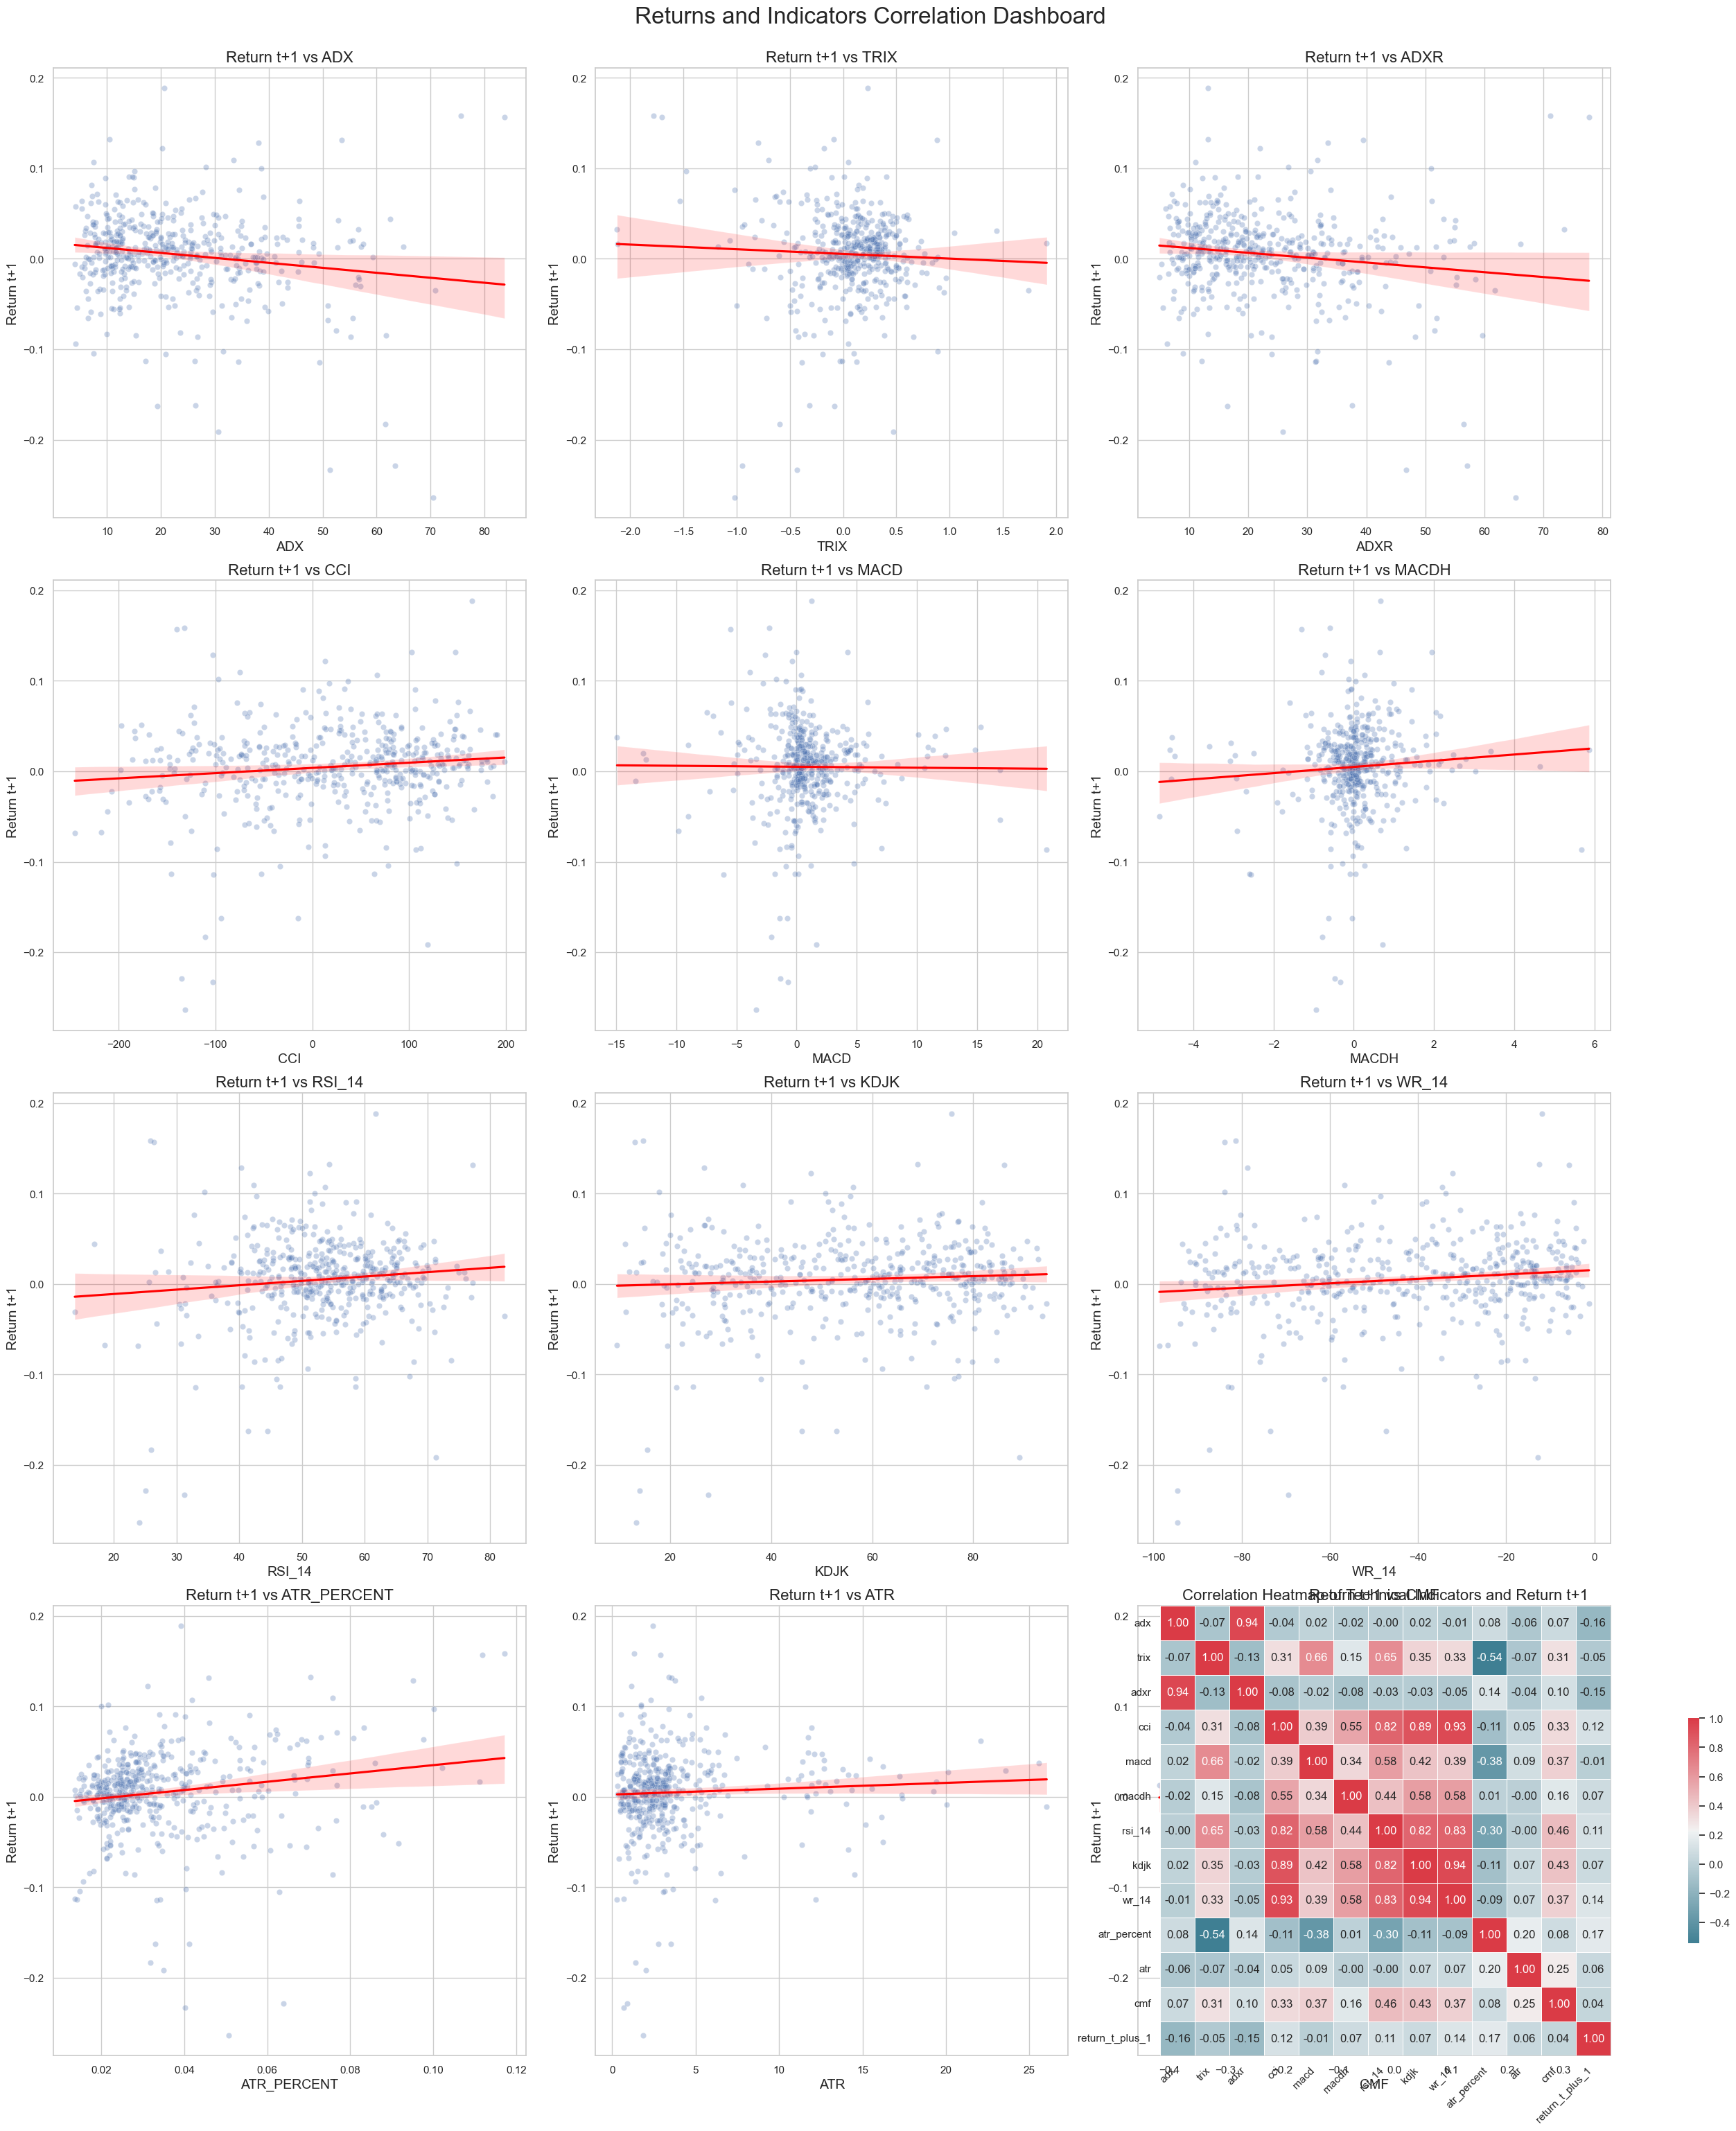

In [6]:
# List of technical indicators to analyze
technical_indicators = ['adx', 'trix', 'adxr', 'cci', 'macd', 'macdh',
                        'rsi_14', 'kdjk', 'wr_14', 'atr_percent', 'atr', 'cmf']

# Scatter Plots of Returns vs. Indicators
num_indicators = len(technical_indicators)
cols = 3
rows = num_indicators // cols + int(num_indicators % cols > 0)

# Correlation Heatmap
correlation_columns = technical_indicators + ['return_t_plus_1']
corr_matrix = df[correlation_columns].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Assemble All Plots into a Cohesive Dashboard
fig = plt.figure(constrained_layout=True, figsize=(25, 30))
gs = fig.add_gridspec(4, 3)

for i, indicator in enumerate(technical_indicators):
    # Scatter Plot
    row = i // cols
    col = i % cols
    ax = fig.add_subplot(gs[row, col])
    sns.scatterplot(data=df, x=indicator, y='return_t_plus_1', alpha=0.3, ax=ax)
    sns.regplot(data=df, x=indicator, y='return_t_plus_1', scatter=False, color='red', ax=ax)
    ax.set_title(f'Return t+1 vs {indicator.upper()}')
    ax.set_xlabel(indicator.upper())
    ax.set_ylabel('Return t+1')
    ax.grid(True)

# Correlation Heatmap spanning all columns
ax_heatmap = fig.add_subplot(gs[rows, :]) if num_indicators % cols != 0 else fig.add_subplot(gs[rows-1, :])
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax_heatmap)
ax_heatmap.set_title('Correlation Heatmap of Technical Indicators and Return t+1')
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right')
ax_heatmap.set_yticklabels(ax_heatmap.get_yticklabels(), rotation=0)

plt.suptitle('Returns and Indicators Correlation Dashboard', fontsize=24, y=1.02)
plt.show()


### **Dashboard 5**


Average CMF Over Time:
        Date       cmf
0 2020-01-31  0.020692
1 2020-02-07 -0.028566
2 2020-02-14 -0.011619
3 2020-02-21 -0.035412
4 2020-02-28 -0.118426


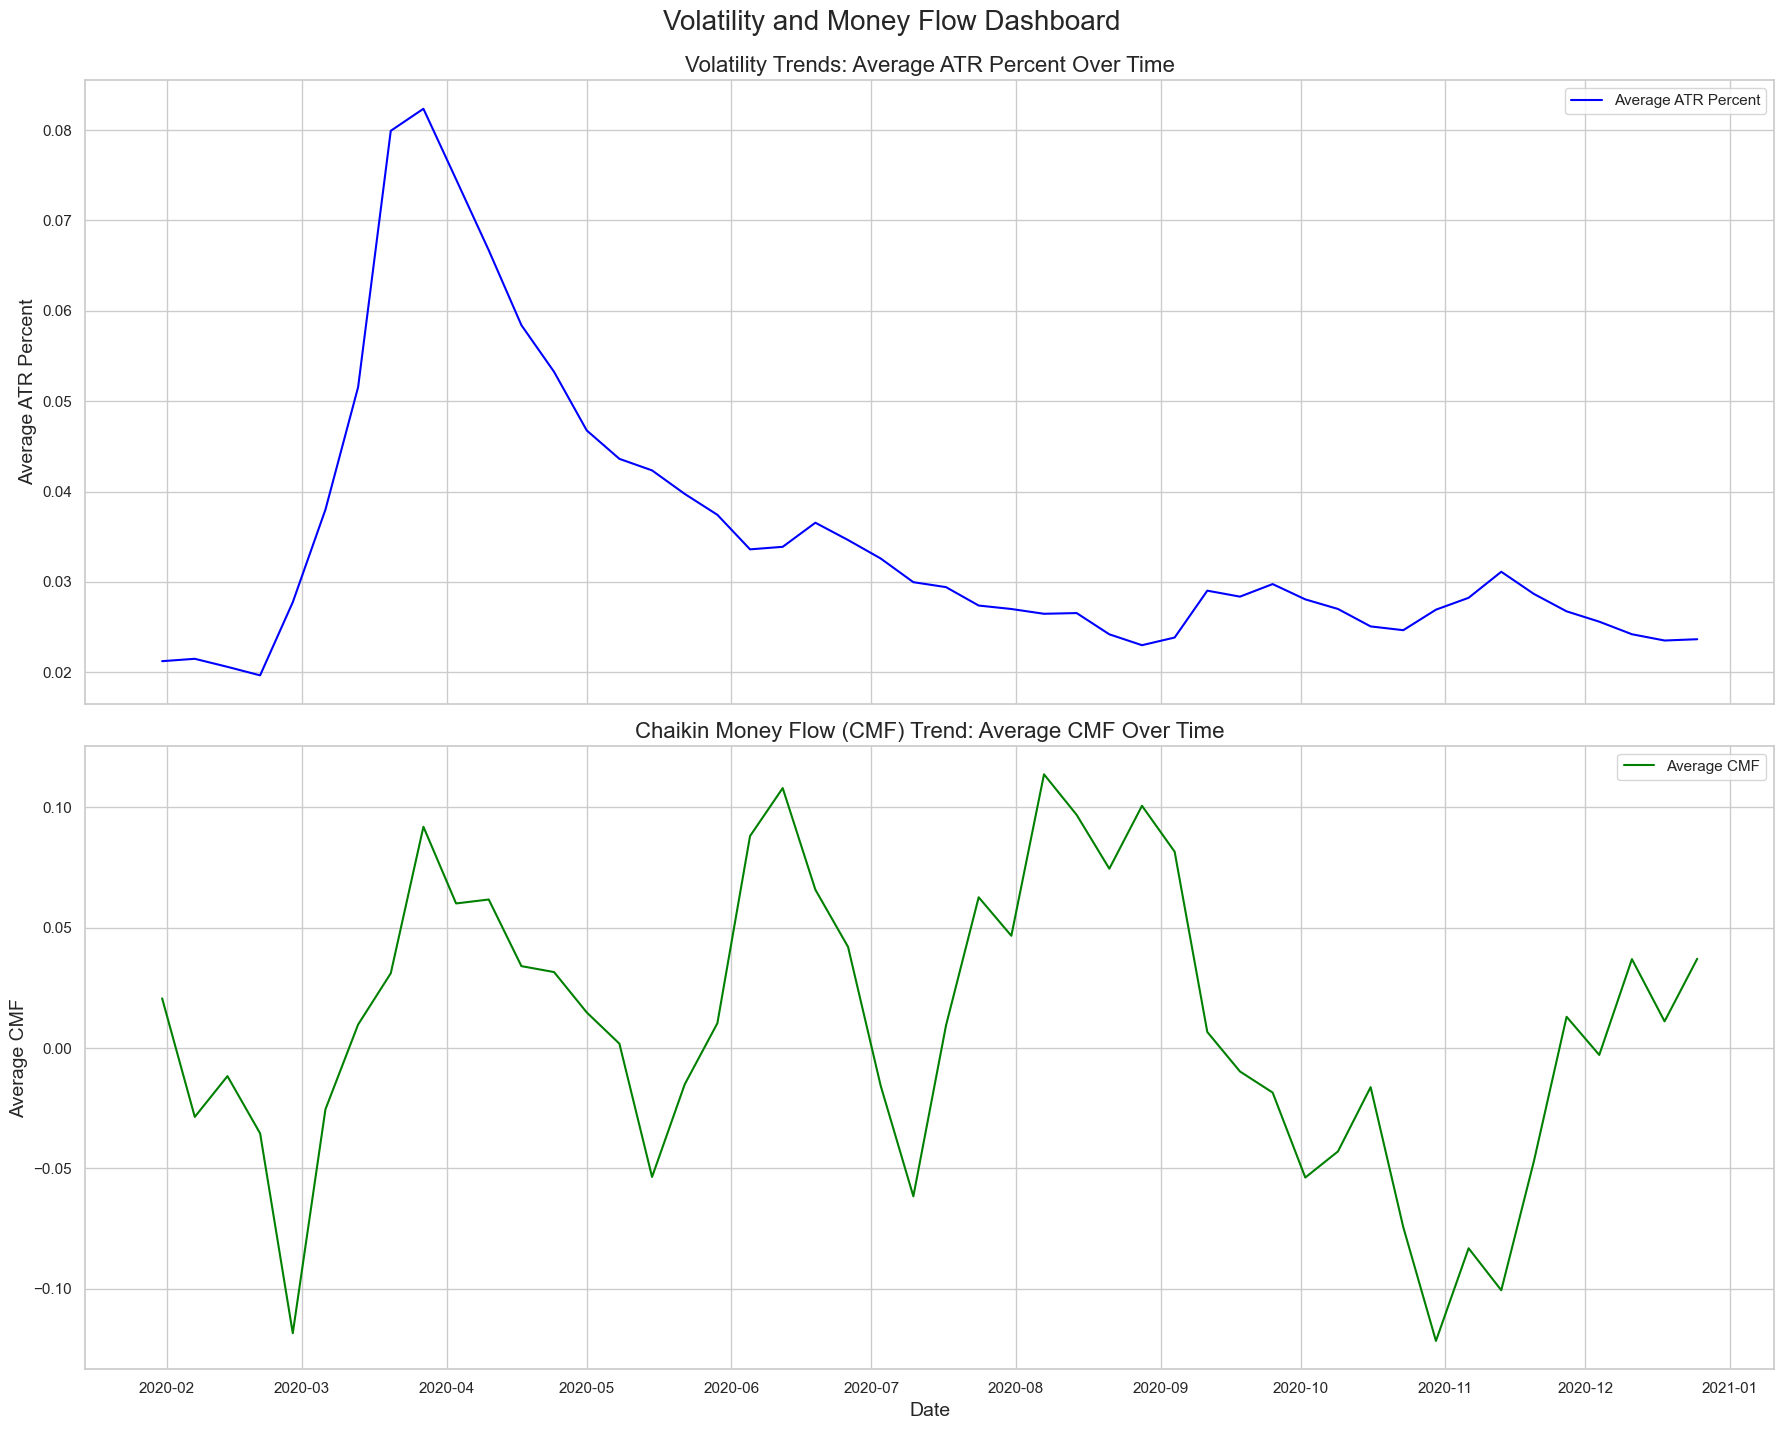

In [7]:
# Calculate Average ATR Percent Over Time
avg_atr_percent = df.groupby('Date')['atr_percent'].mean().reset_index()

# Calculate Average CMF Over Time
avg_cmf = df.groupby('Date')['cmf'].mean().reset_index()
print("\nAverage CMF Over Time:")
print(avg_cmf.head())

# Assemble the Dashboard
fig, axes = plt.subplots(2, 1, figsize=(18, 14), sharex=True)

# Plot Volatility Trends on the first subplot
sns.lineplot(data=avg_atr_percent, x='Date', y='atr_percent', color='blue', ax=axes[0], label='Average ATR Percent')
axes[0].set_title('Volatility Trends: Average ATR Percent Over Time', fontsize=16)
axes[0].set_ylabel('Average ATR Percent', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# Plot CMF Trend on the second subplot
sns.lineplot(data=avg_cmf, x='Date', y='cmf', color='green', ax=axes[1], label='Average CMF')
axes[1].set_title('Chaikin Money Flow (CMF) Trend: Average CMF Over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Average CMF', fontsize=14)
axes[1].legend()
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the dashboard
fig.suptitle('Volatility and Money Flow Dashboard', fontsize=20, y=1.02)

# Show the dashboard
plt.show()


### **Dashboard 6**


Average ATR Percent Over Time:
        Date  atr_percent
0 2020-01-31     0.021239
1 2020-02-07     0.021502
2 2020-02-14     0.020612
3 2020-02-21     0.019672
4 2020-02-28     0.027765

Average CMF Over Time:
        Date       cmf
0 2020-01-31  0.020692
1 2020-02-07 -0.028566
2 2020-02-14 -0.011619
3 2020-02-21 -0.035412
4 2020-02-28 -0.118426


C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\4075158146.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gainers, x='ticker', y='return_t_plus_1', palette='viridis', ax=ax2)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\4075158146.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_losers, x='ticker', y='return_t_plus_1', palette='magma', ax=ax4)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\4075158146.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rsi_extremes, x='ticker', y='rsi_14', palette='coo

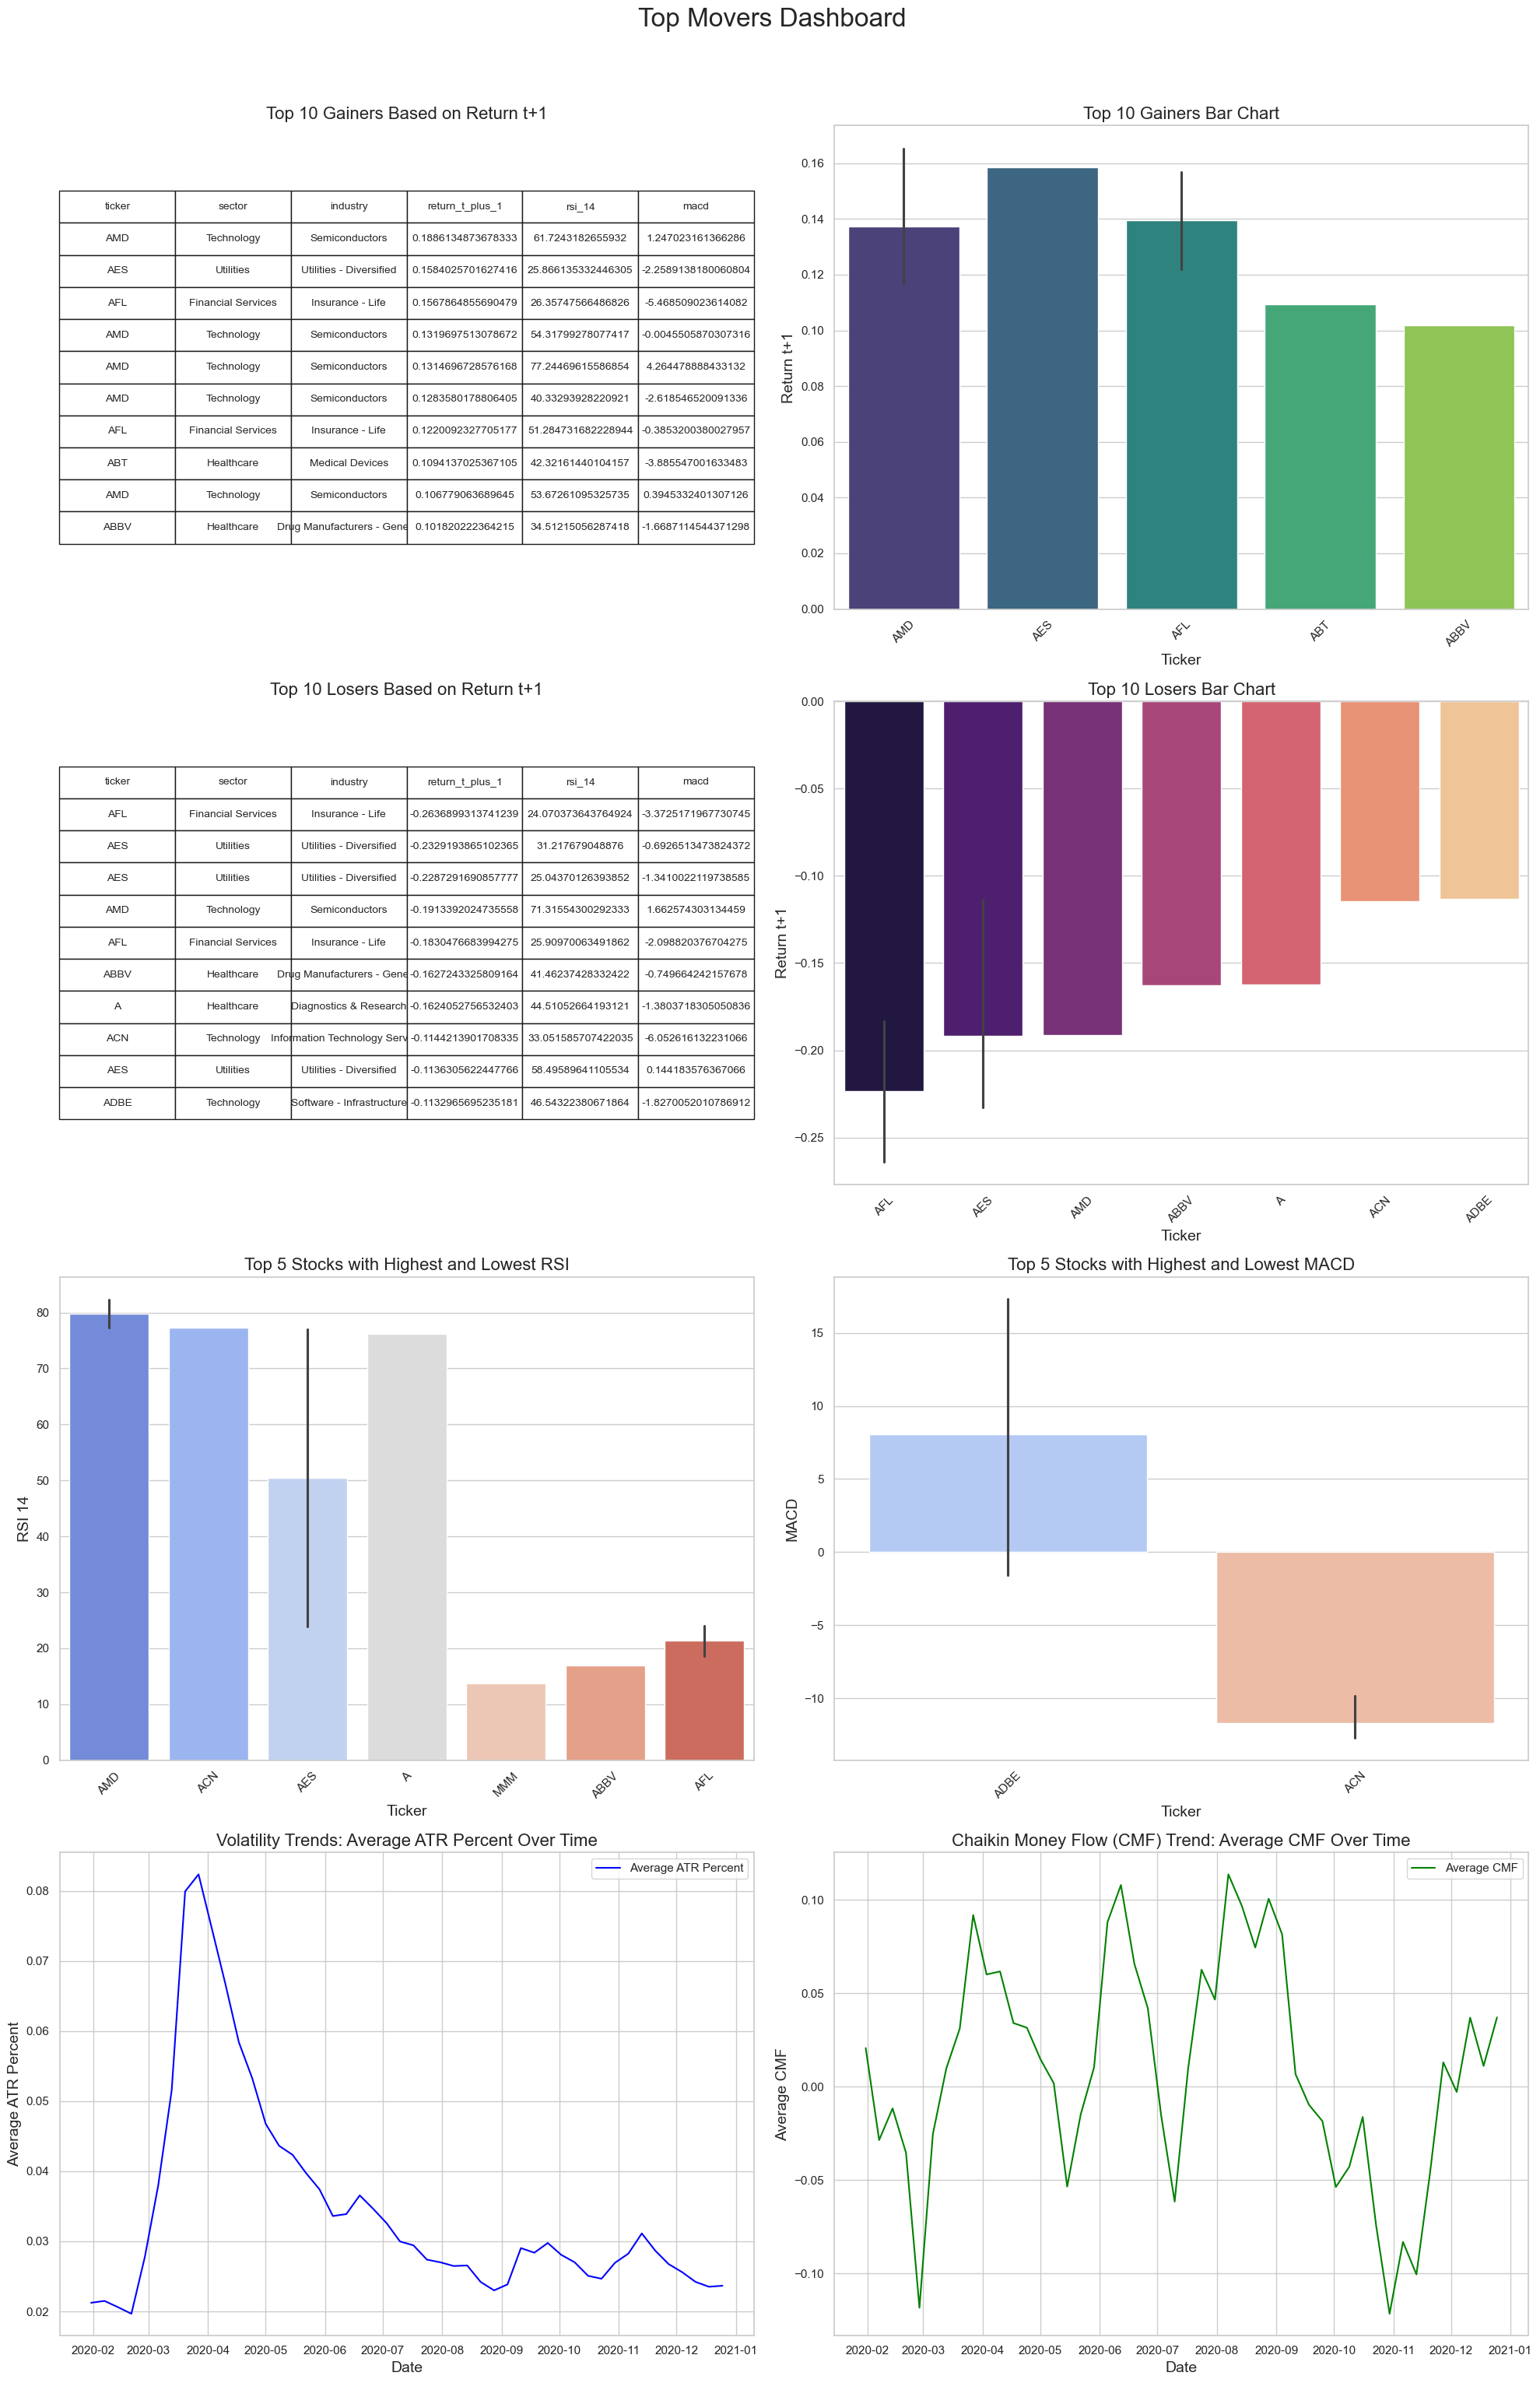

In [8]:
# Define the number of top movers to display
top_n = 10

# Top Gainers based on 'return_t_plus_1'
top_gainers = df.nlargest(top_n, 'return_t_plus_1')[['ticker', 'sector', 'industry', 'return_t_plus_1', 'rsi_14', 'macd']]

# Top Losers based on 'return_t_plus_1'
top_losers = df.nsmallest(top_n, 'return_t_plus_1')[['ticker', 'sector', 'industry', 'return_t_plus_1', 'rsi_14', 'macd']]

# Define the number of extreme stocks to display
extreme_n = 5

# Top 5 Stocks with Highest RSI
highest_rsi = df.nlargest(extreme_n, 'rsi_14')[['ticker', 'sector', 'industry', 'rsi_14', 'return_t_plus_1']]

# Bottom 5 Stocks with Lowest RSI
lowest_rsi = df.nsmallest(extreme_n, 'rsi_14')[['ticker', 'sector', 'industry', 'rsi_14', 'return_t_plus_1']]

# Top 5 Stocks with Highest MACD
highest_macd = df.nlargest(extreme_n, 'macd')[['ticker', 'sector', 'industry', 'macd', 'return_t_plus_1']]

# Bottom 5 Stocks with Lowest MACD
lowest_macd = df.nsmallest(extreme_n, 'macd')[['ticker', 'sector', 'industry', 'macd', 'return_t_plus_1']]

# Combine highest and lowest RSI for plotting
rsi_extremes = pd.concat([highest_rsi, lowest_rsi])

# Combine highest and lowest MACD for plotting
macd_extremes = pd.concat([highest_macd, lowest_macd])


# Calculate Average ATR Percent Over Time
avg_atr_percent = df.groupby('Date')['atr_percent'].mean().reset_index()
print("\nAverage ATR Percent Over Time:")
print(avg_atr_percent.head())

# Calculate Average CMF Over Time
avg_cmf = df.groupby('Date')['cmf'].mean().reset_index()
print("\nAverage CMF Over Time:")
print(avg_cmf.head())

# Assemble the Dashboard
fig = plt.figure(constrained_layout=True, figsize=(20, 30))
gs = fig.add_gridspec(4, 2)  # 4 rows, 2 columns

# 5.1. Top Gainers Table
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')  # Hide the axis
table1 = ax1.table(cellText=top_gainers.values,
                   colLabels=top_gainers.columns,
                   cellLoc='center',
                   loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
table1.scale(1, 2)
ax1.set_title('Top 10 Gainers Based on Return t+1', fontsize=16)

# 5.2. Top Gainers Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=top_gainers, x='ticker', y='return_t_plus_1', palette='viridis', ax=ax2)
ax2.set_title('Top 10 Gainers Bar Chart', fontsize=16)
ax2.set_xlabel('Ticker')
ax2.set_ylabel('Return t+1')
ax2.tick_params(axis='x', rotation=45)

# 5.3. Top Losers Table
ax3 = fig.add_subplot(gs[1, 0])
ax3.axis('off')  # Hide the axis
table2 = ax3.table(cellText=top_losers.values,
                   colLabels=top_losers.columns,
                   cellLoc='center',
                   loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.scale(1, 2)
ax3.set_title('Top 10 Losers Based on Return t+1', fontsize=16)

# 5.4. Top Losers Bar Chart
ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(data=top_losers, x='ticker', y='return_t_plus_1', palette='magma', ax=ax4)
ax4.set_title('Top 10 Losers Bar Chart', fontsize=16)
ax4.set_xlabel('Ticker')
ax4.set_ylabel('Return t+1')
ax4.tick_params(axis='x', rotation=45)

# 5.5. Indicator Extremes - RSI
ax5 = fig.add_subplot(gs[2, 0])
sns.barplot(data=rsi_extremes, x='ticker', y='rsi_14', palette='coolwarm', ax=ax5)
ax5.set_title('Top 5 Stocks with Highest and Lowest RSI', fontsize=16)
ax5.set_xlabel('Ticker')
ax5.set_ylabel('RSI 14')
ax5.tick_params(axis='x', rotation=45)

# 5.6. Indicator Extremes - MACD
ax6 = fig.add_subplot(gs[2, 1])
sns.barplot(data=macd_extremes, x='ticker', y='macd', palette='coolwarm', ax=ax6)
ax6.set_title('Top 5 Stocks with Highest and Lowest MACD', fontsize=16)
ax6.set_xlabel('Ticker')
ax6.set_ylabel('MACD')
ax6.tick_params(axis='x', rotation=45)

# 5.7. Volatility Trends (ATR Percent)
ax7 = fig.add_subplot(gs[3, 0])
sns.lineplot(data=avg_atr_percent, x='Date', y='atr_percent', color='blue', ax=ax7, label='Average ATR Percent')
ax7.set_title('Volatility Trends: Average ATR Percent Over Time', fontsize=16)
ax7.set_xlabel('Date')
ax7.set_ylabel('Average ATR Percent')
ax7.legend()
ax7.grid(True)

# 5.8. Chaikin Money Flow (CMF) Trend
ax8 = fig.add_subplot(gs[3, 1])
sns.lineplot(data=avg_cmf, x='Date', y='cmf', color='green', ax=ax8, label='Average CMF')
ax8.set_title('Chaikin Money Flow (CMF) Trend: Average CMF Over Time', fontsize=16)
ax8.set_xlabel('Date')
ax8.set_ylabel('Average CMF')
ax8.legend()
ax8.grid(True)

# Add an overall title for the dashboard
fig.suptitle('Top Movers Dashboard', fontsize=24, y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show the dashboard
plt.show()

### **Dashboard 7**


Data with RSI and CCI Conditions:
  ticker       sector     rsi_14 RSI_Condition         cci CCI_Condition
0    MMM  Industrials  13.788754      Oversold -169.352695      Oversold
1    MMM  Industrials  28.746843      Oversold  -67.996164       Neutral
2    MMM  Industrials  35.558660       Neutral  -37.621545       Neutral
3    MMM  Industrials  33.506081       Neutral  -65.359377       Neutral
4    MMM  Industrials  26.671967      Oversold -165.044333      Oversold

RSI Condition Counts by Sector:
               sector RSI_Condition  count  total  percentage
0  Financial Services       Neutral     42     48   87.500000
1  Financial Services    Overbought      2     48    4.166667
2  Financial Services      Oversold      4     48    8.333333
3          Healthcare       Neutral    134    144   93.055556
4          Healthcare    Overbought      7    144    4.861111

CCI Condition Counts by Sector:
               sector CCI_Condition  count  total  percentage
0  Financial Services      

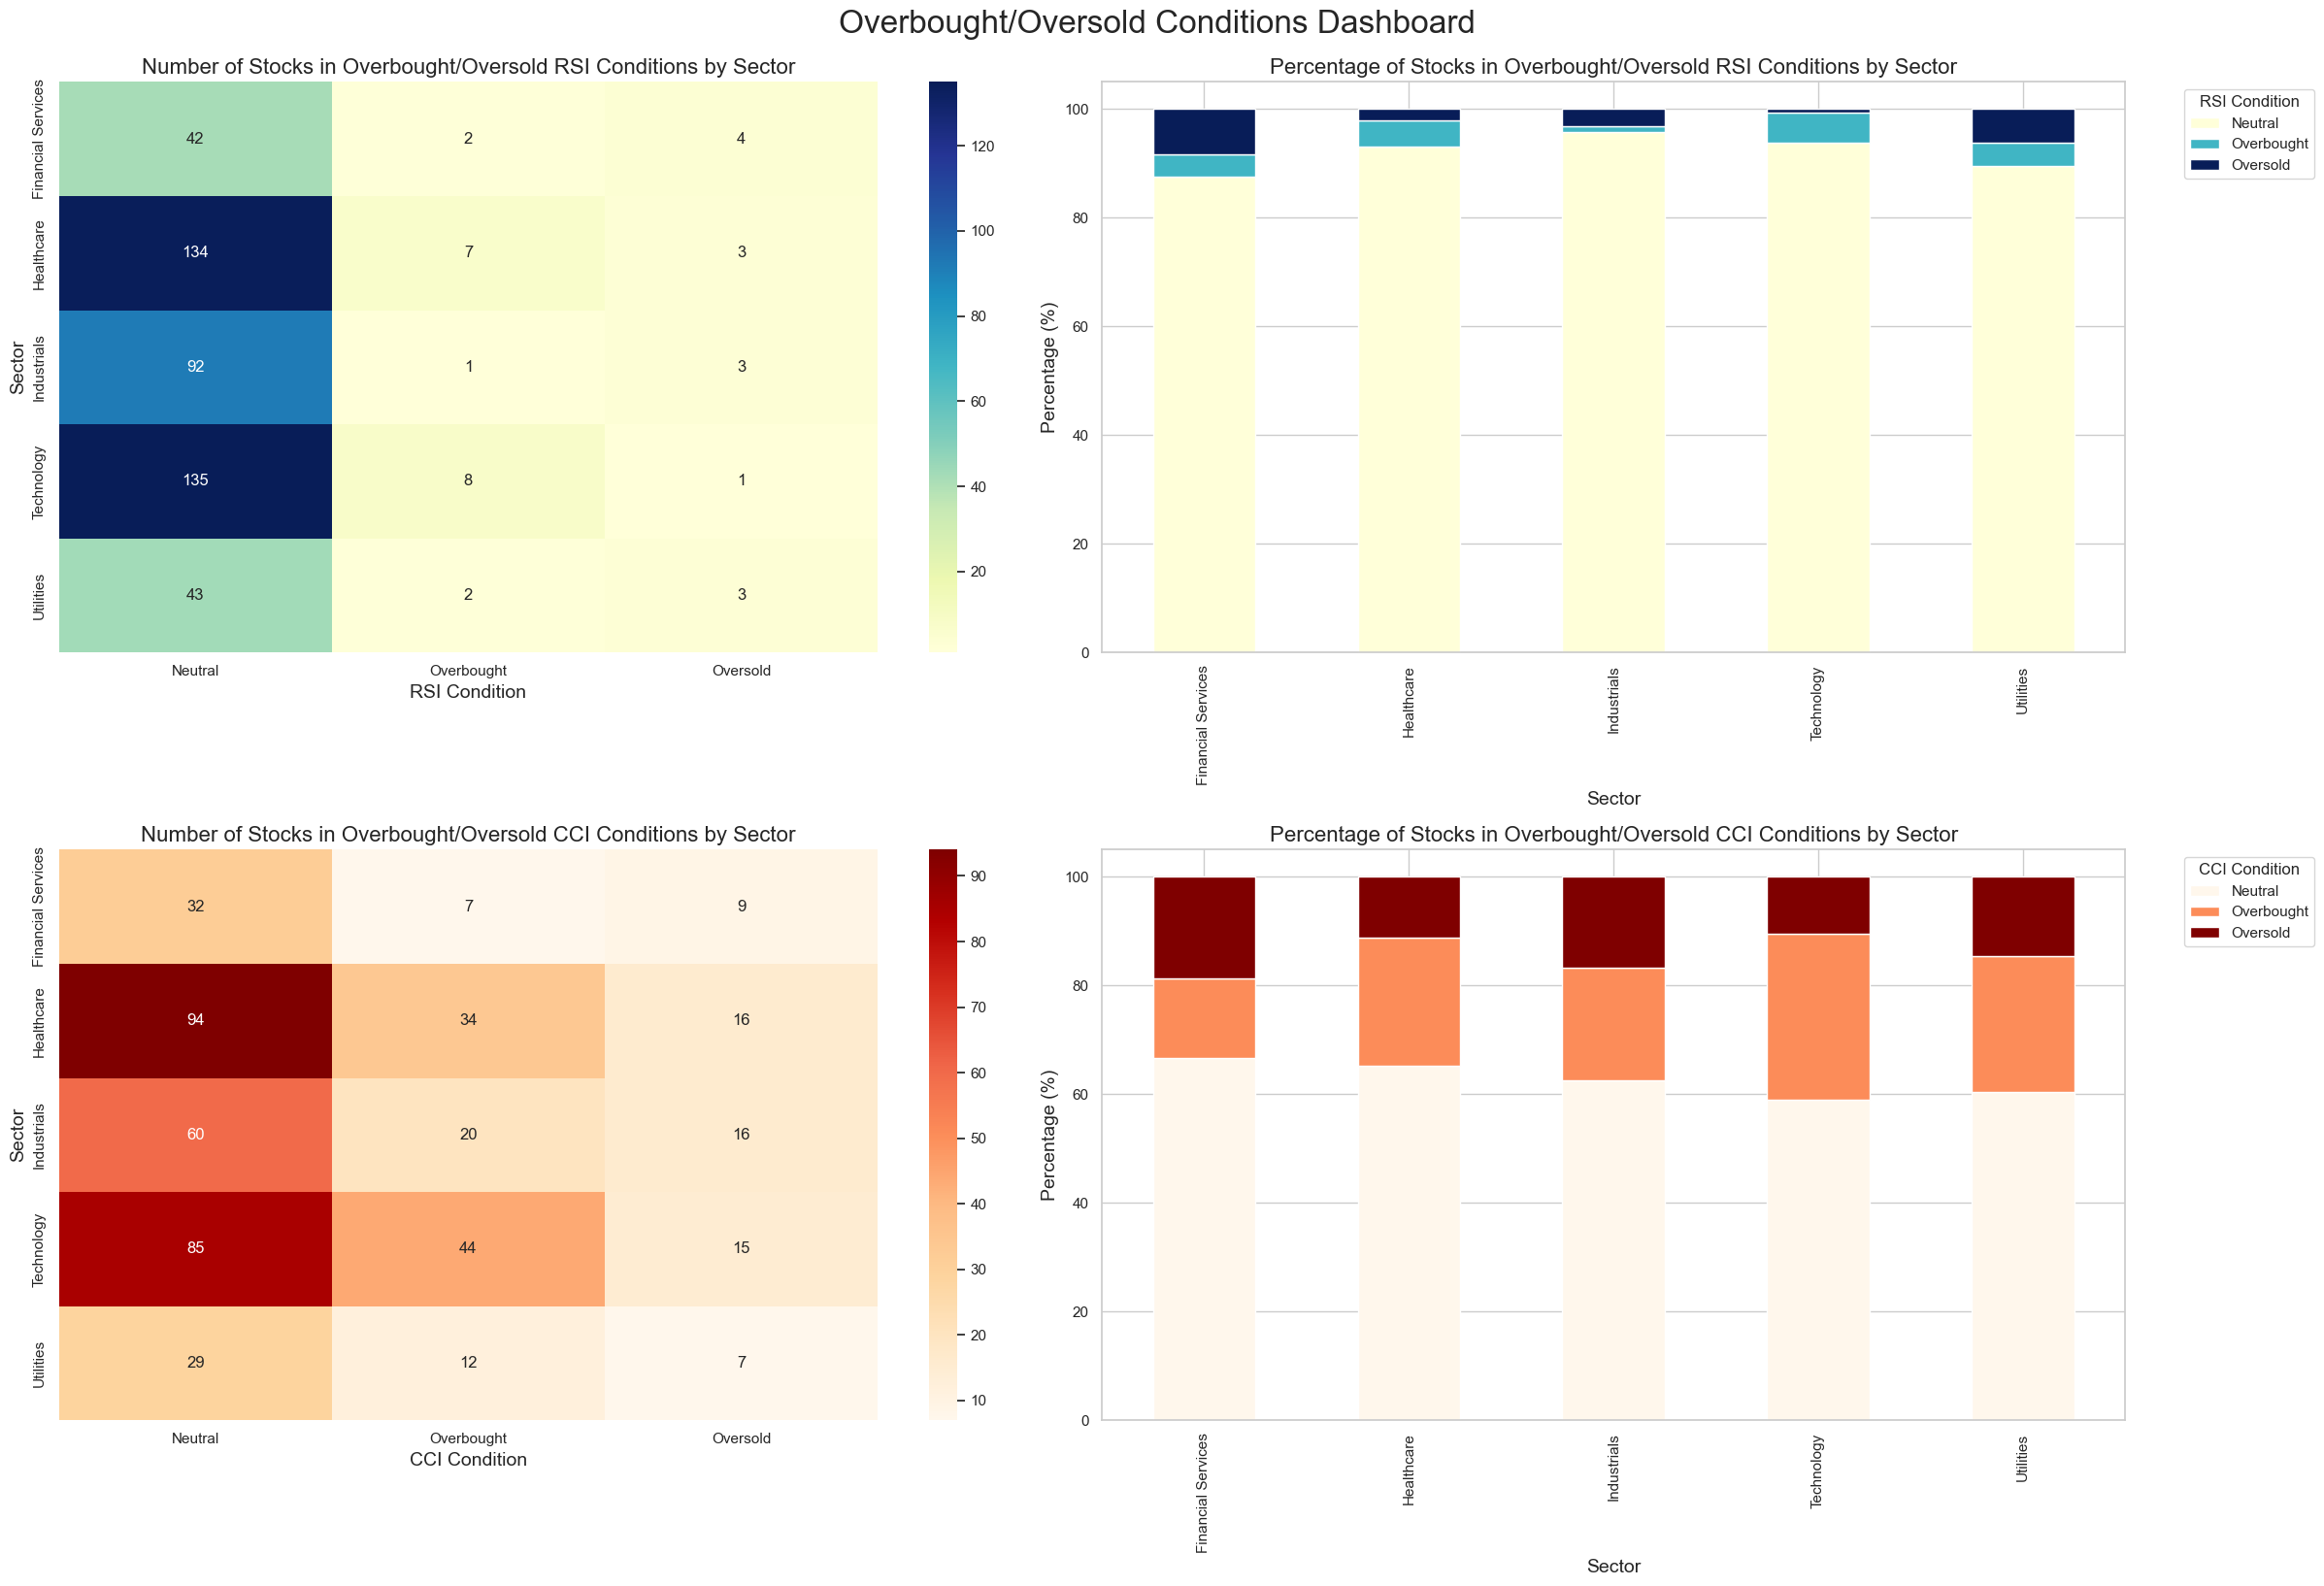

In [10]:
# 3. Define Overbought and Oversold Thresholds
rsi_overbought = 70
rsi_oversold = 30
cci_overbought = 100
cci_oversold = -100

# 4. Flag Overbought and Oversold Stocks
df['RSI_Condition'] = 'Neutral'
df.loc[df['rsi_14'] > rsi_overbought, 'RSI_Condition'] = 'Overbought'
df.loc[df['rsi_14'] < rsi_oversold, 'RSI_Condition'] = 'Oversold'

df['CCI_Condition'] = 'Neutral'
df.loc[df['cci'] > cci_overbought, 'CCI_Condition'] = 'Overbought'
df.loc[df['cci'] < cci_oversold, 'CCI_Condition'] = 'Oversold'

print("\nData with RSI and CCI Conditions:")
print(df[['ticker', 'sector', 'rsi_14', 'RSI_Condition', 'cci', 'CCI_Condition']].head())

# 5. Calculate the Number and Percentage of Stocks in Each Condition by Sector
def calculate_condition_counts(df, condition_col):
    condition_counts = df.groupby(['sector', condition_col]).size().reset_index(name='count')
    total_counts = df.groupby('sector').size().reset_index(name='total')
    condition_counts = condition_counts.merge(total_counts, on='sector')
    condition_counts['percentage'] = (condition_counts['count'] / condition_counts['total']) * 100
    return condition_counts

# Calculate for RSI
rsi_condition_counts = calculate_condition_counts(df, 'RSI_Condition')

# Calculate for CCI
cci_condition_counts = calculate_condition_counts(df, 'CCI_Condition')

print("\nRSI Condition Counts by Sector:")
print(rsi_condition_counts.head())

print("\nCCI Condition Counts by Sector:")
print(cci_condition_counts.head())

# 6. Plot RSI Levels Across Market

# a. Heatmap of RSI Conditions by Sector
# a. Heatmap of RSI Conditions by Sector
rsi_pivot = rsi_condition_counts.pivot(index='sector', columns='RSI_Condition', values='count')
rsi_pivot = rsi_pivot.fillna(0)

# b. Bar Chart of RSI Conditions by Sector (Percentage)
rsi_pivot_percentage = rsi_condition_counts.pivot(index='sector', columns='RSI_Condition', values='percentage')
rsi_pivot_percentage = rsi_pivot_percentage.fillna(0)


# a. Heatmap of CCI Conditions by Sector
cci_pivot = cci_condition_counts.pivot(index='sector', columns='CCI_Condition', values='count')
cci_pivot = cci_pivot.fillna(0)

# b. Bar Chart of CCI Conditions by Sector (Percentage)
cci_pivot_percentage = cci_condition_counts.pivot(index='sector', columns='CCI_Condition', values='percentage')
cci_pivot_percentage = cci_pivot_percentage.fillna(0)

# 8. Assemble All Components into a Cohesive Dashboard

fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# 8.1. RSI Heatmap
sns.heatmap(rsi_pivot, annot=True, fmt=".0f", cmap='YlGnBu', ax=axes[0, 0])
axes[0, 0].set_title('Number of Stocks in Overbought/Oversold RSI Conditions by Sector')
axes[0, 0].set_xlabel('RSI Condition')
axes[0, 0].set_ylabel('Sector')

# 8.2. RSI Percentage Bar Chart
rsi_pivot_percentage.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='YlGnBu')
axes[0, 1].set_title('Percentage of Stocks in Overbought/Oversold RSI Conditions by Sector')
axes[0, 1].set_xlabel('Sector')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].legend(title='RSI Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8.3. CCI Heatmap
sns.heatmap(cci_pivot, annot=True, fmt=".0f", cmap='OrRd', ax=axes[1, 0])
axes[1, 0].set_title('Number of Stocks in Overbought/Oversold CCI Conditions by Sector')
axes[1, 0].set_xlabel('CCI Condition')
axes[1, 0].set_ylabel('Sector')

# 8.4. CCI Percentage Bar Chart
cci_pivot_percentage.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='OrRd')
axes[1, 1].set_title('Percentage of Stocks in Overbought/Oversold CCI Conditions by Sector')
axes[1, 1].set_xlabel('Sector')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].legend(title='CCI Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the dashboard
fig.suptitle('Overbought/Oversold Conditions Dashboard', fontsize=24, y=1.02)

# Show the dashboard
plt.show()

### **Dashboard 8**


Average ADX and ADXR Over Time:
        Date        adx       adxr
0 2020-01-31  31.051045  33.663149
1 2020-02-07  28.591060  31.162842
2 2020-02-14  25.550089  27.088112
3 2020-02-21  26.754674  26.582486
4 2020-02-28  36.169181  30.344950

Average MACD Histogram Over Time:
        Date     macdh
0 2020-01-31 -0.259324
1 2020-02-07 -0.043485
2 2020-02-14  0.338722
3 2020-02-21  0.322248
4 2020-02-28 -0.907788


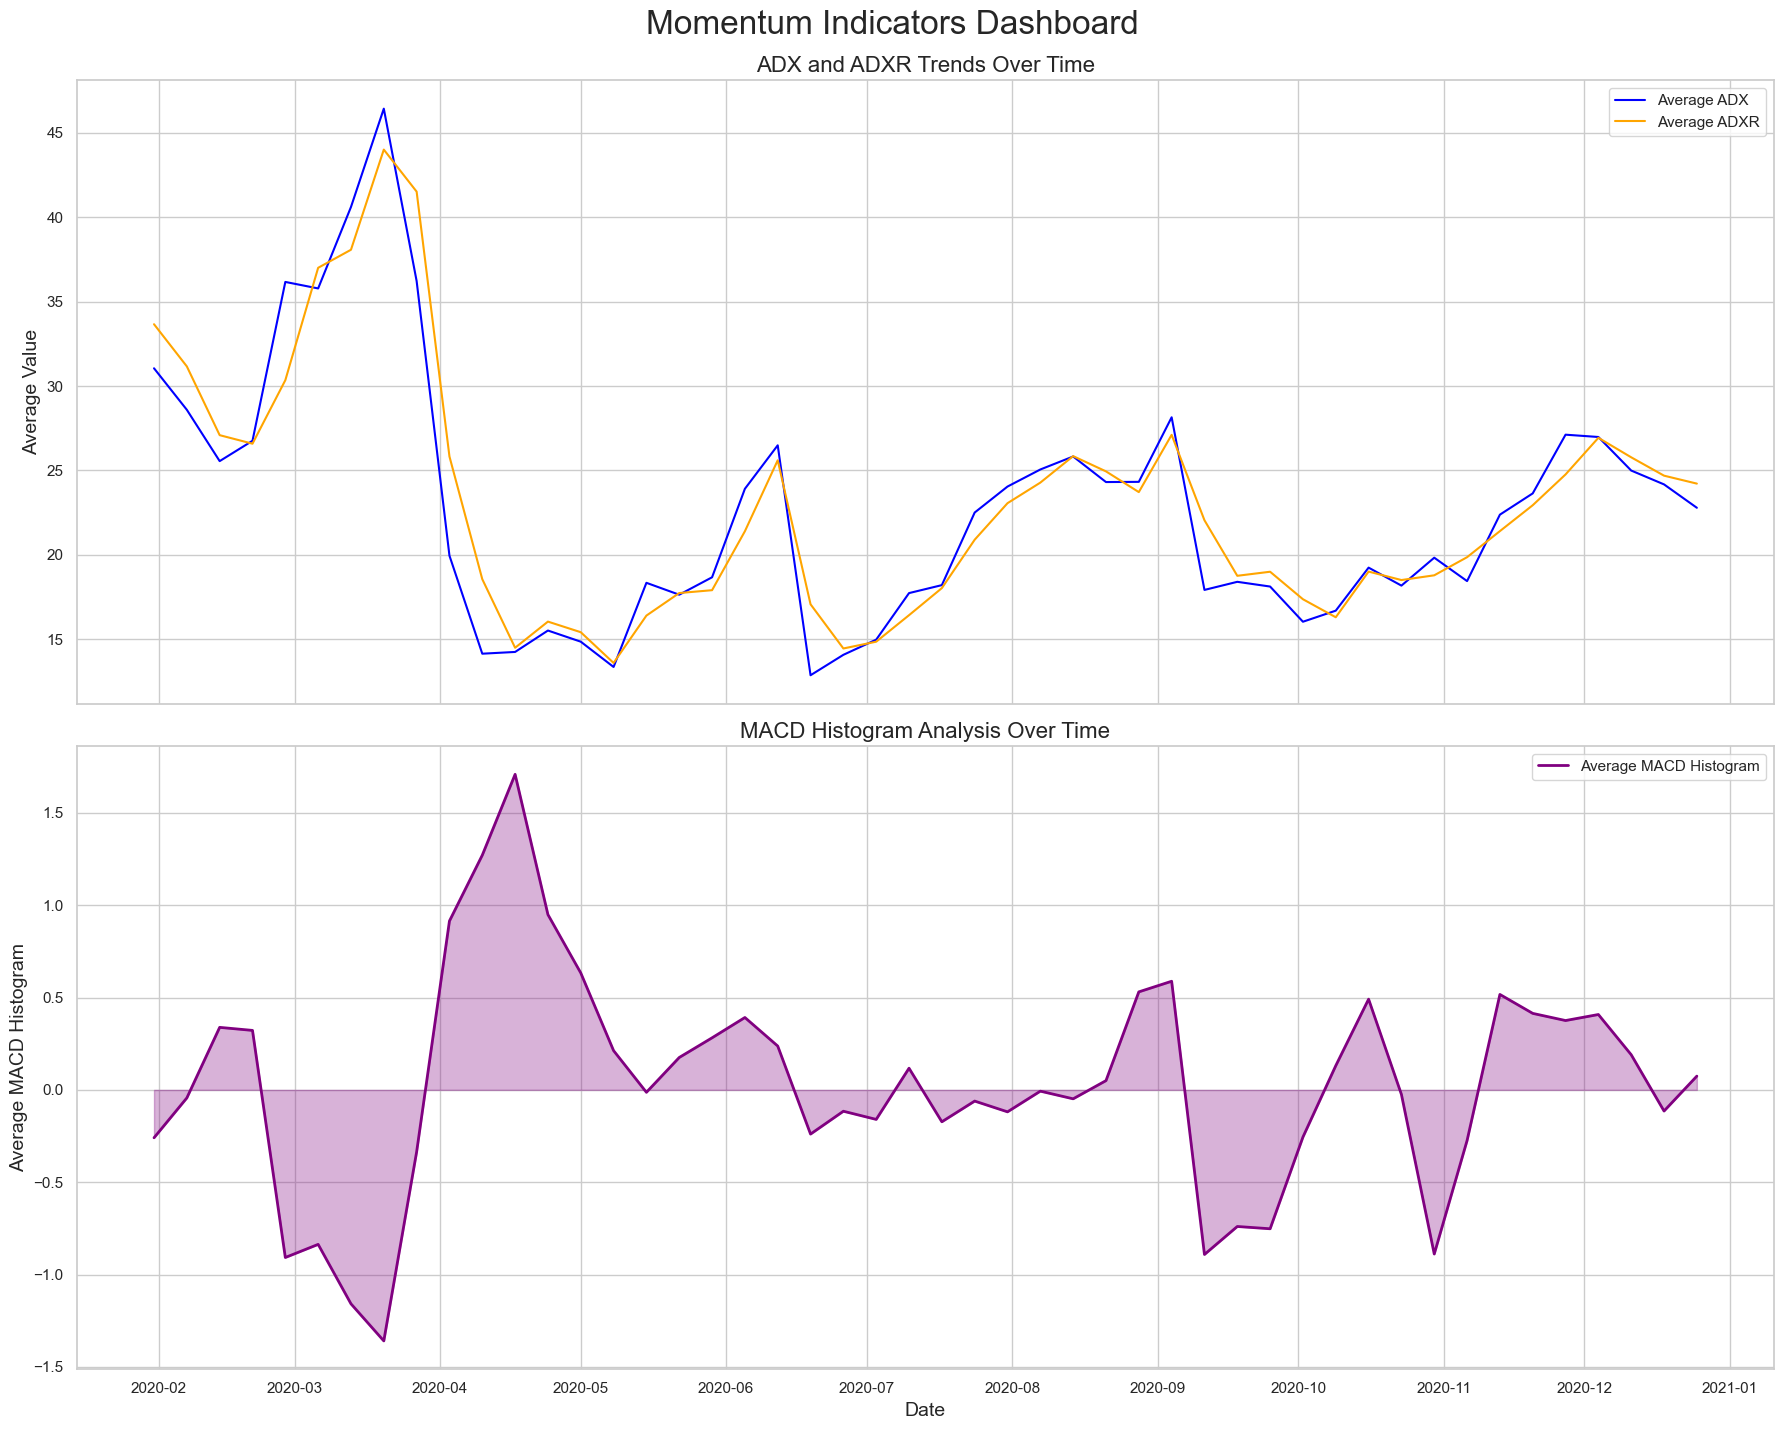

In [11]:
# 3. Calculate Average ADX and ADXR Over Time
avg_adx_adxr = df.groupby('Date')[['adx', 'adxr']].mean().reset_index()
print("\nAverage ADX and ADXR Over Time:")
print(avg_adx_adxr.head())

# 5. Calculate Average MACD Histogram Over Time
avg_macdh = df.groupby('Date')['macdh'].mean().reset_index()
print("\nAverage MACD Histogram Over Time:")
print(avg_macdh.head())

fig, axes = plt.subplots(2, 1, figsize=(18, 14), sharex=True)

# 7.1. ADX and ADXR Trends
sns.lineplot(data=avg_adx_adxr, x='Date', y='adx', color='blue', label='Average ADX', ax=axes[0])
sns.lineplot(data=avg_adx_adxr, x='Date', y='adxr', color='orange', label='Average ADXR', ax=axes[0])
axes[0].set_title('ADX and ADXR Trends Over Time', fontsize=16)
axes[0].set_ylabel('Average Value', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# 7.2. MACD Histogram Analysis
sns.lineplot(data=avg_macdh, x='Date', y='macdh', color='purple', label='Average MACD Histogram', ax=axes[1], linewidth=2)
axes[1].fill_between(avg_macdh['Date'], avg_macdh['macdh'], color='purple', alpha=0.3)
axes[1].set_title('MACD Histogram Analysis Over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Average MACD Histogram', fontsize=14)
axes[1].legend()
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the dashboard
fig.suptitle('Momentum Indicators Dashboard', fontsize=24, y=1.02)

# Show the dashboard
plt.show()

### **Dashboard 10**


MACD Crossover Signals:
         Date ticker MACD_Signal      macd    signal
2  2020-04-10    MMM         Buy -1.622055 -3.763441
13 2020-06-26    MMM        Sell  1.101877  1.729615
20 2020-08-14    MMM         Buy  0.964064  0.648375
26 2020-09-25    MMM        Sell  0.432414  1.032419
29 2020-10-16    MMM         Buy  0.943266  0.935465

Buy Signals:


,Date,ticker,MACD_Signal,macd,signal
2,2020-04-10,MMM,Buy,-1.622055,-3.763441
20,2020-08-14,MMM,Buy,0.964064,0.648375
29,2020-10-16,MMM,Buy,0.943266,0.935465
34,2020-11-20,MMM,Buy,1.467535,0.322006
50,2020-04-10,AOS,Buy,-0.732031,-0.959339
65,2020-07-24,AOS,Buy,1.182535,1.075963
74,2020-09-25,AOS,Buy,0.844786,0.308039
83,2020-11-27,AOS,Buy,0.913564,0.731557
88,2020-01-31,ABT,Buy,0.443222,0.373251
98,2020-04-10,ABT,Buy,0.252616,-1.434703



Sell Signals:


,Date,ticker,MACD_Signal,macd,signal
13,2020-06-26,MMM,Sell,1.101877,1.729615
26,2020-09-25,MMM,Sell,0.432414,1.032419
31,2020-10-30,MMM,Sell,0.056577,0.731245
40,2020-01-31,AOS,Sell,-0.644123,0.887210
61,2020-06-26,AOS,Sell,0.627126,1.137518
67,2020-08-07,AOS,Sell,0.243369,0.927064
79,2020-10-30,AOS,Sell,0.248622,0.649538
84,2020-12-04,AOS,Sell,0.549216,0.675928
89,2020-02-07,ABT,Sell,0.203815,0.405931
104,2020-05-22,ABT,Sell,0.698101,1.166821



Signals with Forward Returns:
        Date ticker MACD_Signal      macd    signal  return_t_plus_1
0 2020-04-10    MMM         Buy -1.622055 -3.763441         0.007657
1 2020-06-26    MMM        Sell  1.101877  1.729615         0.007942
2 2020-08-14    MMM         Buy  0.964064  0.648375        -0.002183
3 2020-09-25    MMM        Sell  0.432414  1.032419        -0.003862
4 2020-10-16    MMM         Buy  0.943266  0.935465         0.007641

Average Forward Return after Buy Signals: 1.64%
Average Forward Return after Sell Signals: 0.95%


C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\1132643601.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=forward_returns, x='Signal', y='Average Return t+1', palette=['green', 'red'], ax=ax4)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10056\1132643601.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


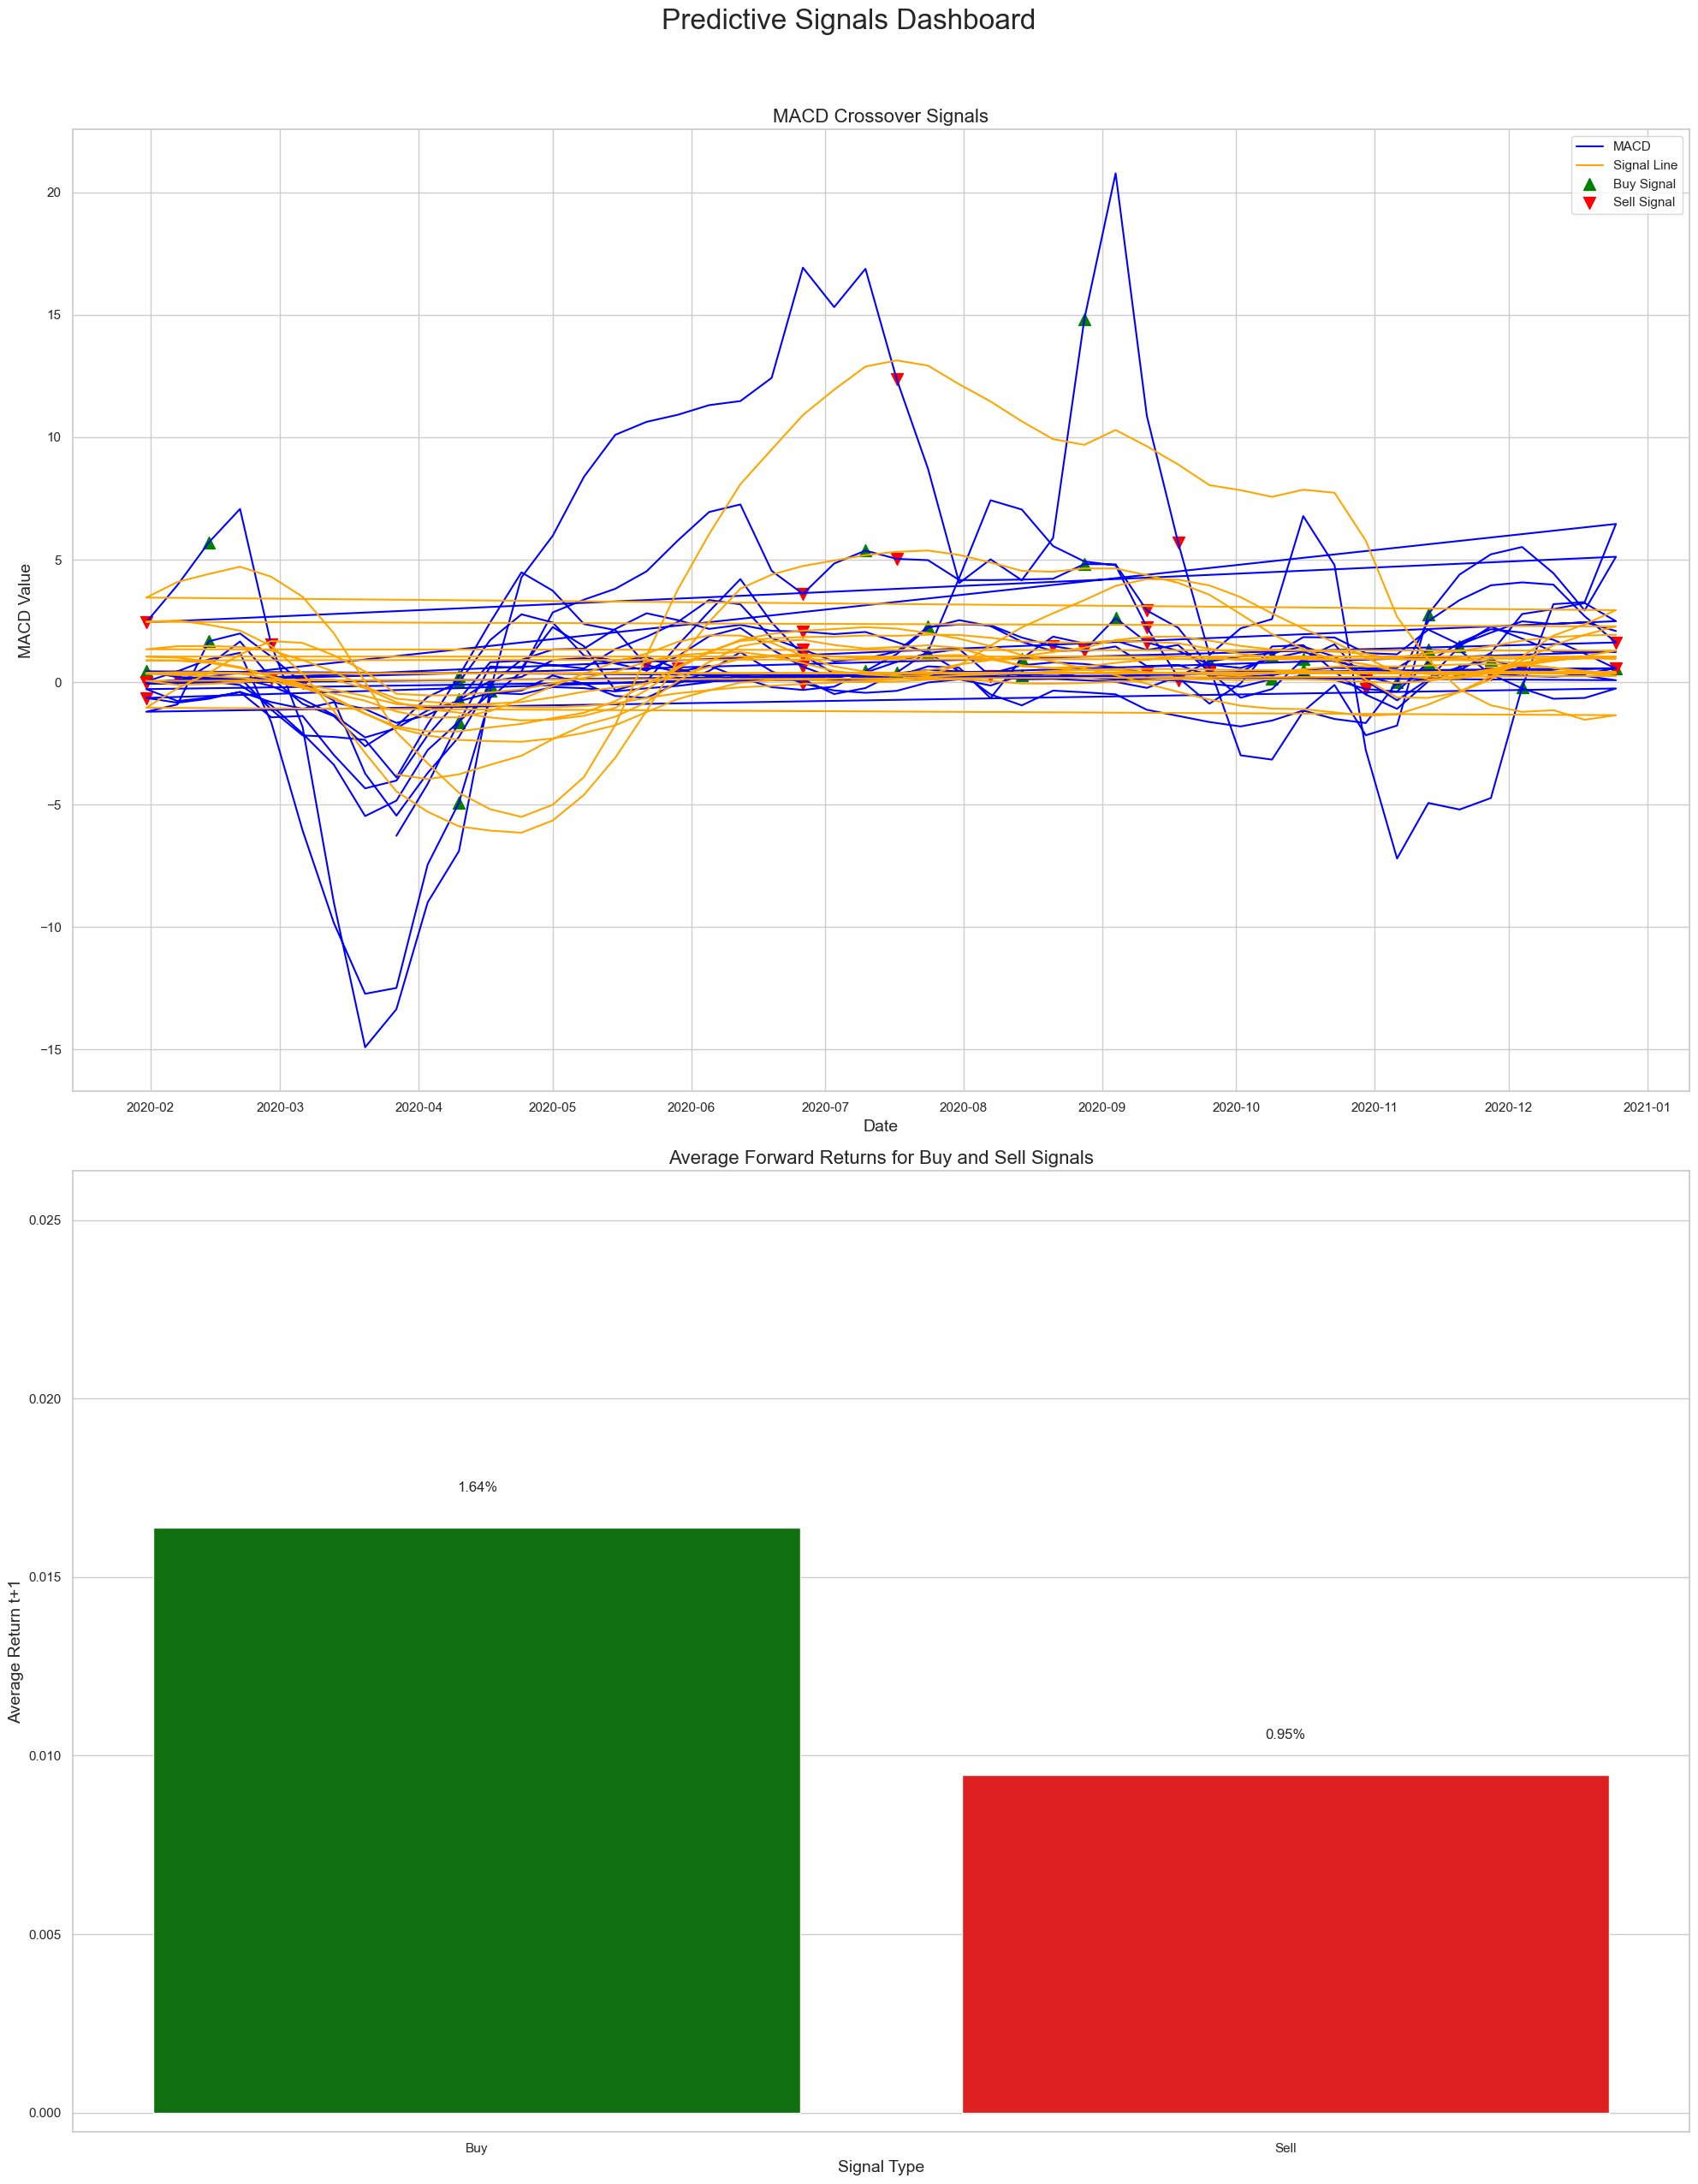

In [12]:
# 3. Identify Buy/Sell Signals Based on MACD Crossovers
# Check if 'signal' column exists
if 'signal' not in df.columns:
    # Calculate the signal line as the rolling mean of MACD
    df['signal'] = df['macd'].rolling(window=9).mean()

# Drop rows where 'signal' is NaN due to rolling window
df = df.dropna(subset=['signal']).reset_index(drop=True)

# Create a column for MACD Crossover Signals
df['MACD_Signal'] = 'Hold'  # Default value

# Identify Buy Signals: MACD crosses above Signal line
buy_signals = (df['macd'] > df['signal']) & (df['macd'].shift(1) <= df['signal'].shift(1))
df.loc[buy_signals, 'MACD_Signal'] = 'Buy'

# Identify Sell Signals: MACD crosses below Signal line
sell_signals = (df['macd'] < df['signal']) & (df['macd'].shift(1) >= df['signal'].shift(1))
df.loc[sell_signals, 'MACD_Signal'] = 'Sell'

# Extract only the signals
signal_df = df[df['MACD_Signal'] != 'Hold'][['Date', 'ticker', 'MACD_Signal', 'macd', 'signal']]

print("\nMACD Crossover Signals:")
print(signal_df.head())

# 4. Display Technical Signals Summary in Tables
from IPython.display import display

# Separate Buy and Sell Signals
buy_signals_df = signal_df[signal_df['MACD_Signal'] == 'Buy']
sell_signals_df = signal_df[signal_df['MACD_Signal'] == 'Sell']

print("\nBuy Signals:")
display(buy_signals_df)

print("\nSell Signals:")
display(sell_signals_df)

# 6. Forward Returns Analysis
# Merge signals with the main DataFrame to get 'return_t_plus_1'
signals_with_returns = signal_df.merge(df[['Date', 'ticker', 'return_t_plus_1']], on=['Date', 'ticker'], how='left')

print("\nSignals with Forward Returns:")
print(signals_with_returns.head())

# Calculate average return_t_plus_1 for Buy and Sell Signals
avg_return_buy = signals_with_returns[signals_with_returns['MACD_Signal'] == 'Buy']['return_t_plus_1'].mean()
avg_return_sell = signals_with_returns[signals_with_returns['MACD_Signal'] == 'Sell']['return_t_plus_1'].mean()

print(f"\nAverage Forward Return after Buy Signals: {avg_return_buy:.2%}")
print(f"Average Forward Return after Sell Signals: {avg_return_sell:.2%}")

# Create a DataFrame for plotting
forward_returns = pd.DataFrame({
    'Signal': ['Buy', 'Sell'],
    'Average Return t+1': [avg_return_buy, avg_return_sell]
})


# 7. Assemble All Components into a Cohesive Dashboard
fig = plt.figure(constrained_layout=True, figsize=(20, 25))
gs = fig.add_gridspec(2, 1)  # 4 rows, 1 column

# 7.3. Technical Signals Summary - MACD Crossover Plot
ax3 = fig.add_subplot(gs[0, 0])
plt.sca(ax3)
plt.plot(df['Date'], df['macd'], label='MACD', color='blue')
plt.plot(df['Date'], df['signal'], label='Signal Line', color='orange')
plt.scatter(buy_signals_df['Date'], buy_signals_df['macd'], marker='^', color='green', s=100, label='Buy Signal')
plt.scatter(sell_signals_df['Date'], sell_signals_df['macd'], marker='v', color='red', s=100, label='Sell Signal')
plt.title('MACD Crossover Signals')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)

# 7.4. Forward Returns Analysis - Average Returns Bar Chart
ax4 = fig.add_subplot(gs[1, 0])
sns.barplot(data=forward_returns, x='Signal', y='Average Return t+1', palette=['green', 'red'], ax=ax4)
ax4.set_title('Average Forward Returns for Buy and Sell Signals')
ax4.set_xlabel('Signal Type')
ax4.set_ylabel('Average Return t+1')
ax4.set_ylim(forward_returns['Average Return t+1'].min() - 0.01, forward_returns['Average Return t+1'].max() + 0.01)
for index, row in forward_returns.iterrows():
    ax4.text(index, row['Average Return t+1'] + 0.001, f"{row['Average Return t+1']:.2%}", ha='center')
    
# Add an overall title for the dashboard
fig.suptitle('Predictive Signals Dashboard', fontsize=24, y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show the dashboard
plt.show()